In [1]:
from time import gmtime
from IPython.display import clear_output
tmstart = gmtime()

In [4]:
from ece470_lib import *

inTOmm = 25.4;

# Joint Axes Orientations
a0 = [0,0,1];
a1 = [0,-1,0];
a2 = [0,-1,0];
a3 = [0,-1,0];
a4 = [1,0,0];
a5 = [1,0,0];

# Joint Axes Positions (Ant point on axis)
q0 = [0,0,0];
q1 = [3.76*inTOmm,0,8.11*inTOmm];
q2 = [11.76*inTOmm,0,8.11*inTOmm];
q3 = [17.76*inTOmm,0,8.11*inTOmm];
q4 = [19.48*inTOmm,0,8.11*inTOmm];
q5 = [19.48*inTOmm,50,8.11*inTOmm];

# Convert to Screws (rotation about an axis+linear motions along screw)
s0 = toScrew(a0,q0);
s1 = toScrew(a1,q1);
s2 = toScrew(a2,q2);
s3 = toScrew(a3,q3);
s4 = toScrew(a4,q4);
s5 = toScrew(a5,q5);

# Assemble Screw Bank
S=[s0,s1,s2,s3,s4,s5]


#       [xToolInSpace, yToolInSpace, zToolInSpace]
toolRot = np.array([[ 0,0,1],# tool frame axes expressed in space frame coordiantes
                    [ 0,1,0],
                    [-1,0,0]]);

toolPos = np.array([[19.48*inTOmm+400 , 50 , 8.11*inTOmm]]).transpose(); #position of tool end in space frame
M=toPose(toolRot,toolPos); # Assemble Pose Matrix of Tool in space frame coordiantes

# define goal Pose
goalRot = np.eye(3);

#Test Points
X=np.arange(-10,555,5);
# Y=X;
Y=np.array([0])
Z=np.arange(600,1225,5)

# instantiate loop variables


In [ ]:
validTheta = np.zeros((X.size, Y.size, Z.size)); # indicates presence of solution at each test point
thetaMap = [[[np.ones((6,1))*-99 for i in range(Z.size)] for j in range(Y.size)] for k in range(X.size)]; #initiate ik Map
valCount=0
invalCount = 0
totCount=0
lastValTheta = np.zeros((len(S[0]),1)) #stores last ik solution
for i in range(X.size):
    for j in range(Y.size):
        for k in range(Z.size):
            print("valid=",valCount,"invalid=",invalCount,"tested",totCount,"out of",X.size*Y.size*Z.size,[X[i],Y[j],Z[k]])
            totCount+=1
            goalPos = np.array([[X[i],Y[j],Z[k]]]).transpose();
            goalT = toPose(goalRot,goalPos);
            thetaMat,norm = findIK(goalT, S,M,max_iter=100);
            clear_output(wait=True)
            if(len(thetaMat)>0):
                print(len(thetaMat))
#                 print(thetaMat,"\n")
                valCount+=1
                lastValTheta=thetaMat[0]
                validTheta[i,j,k]=len(thetaMat);
                thetaMap[i][j][k]=thetaMat;
            else:
                invalCount+=1
                print(norm)

In [3]:
tmstop = gmtime()

In [15]:
print(X.size*Y.size*Z.size)
print(tmstart)
print(tmstop)

14125
time.struct_time(tm_year=2021, tm_mon=4, tm_mday=10, tm_hour=17, tm_min=23, tm_sec=12, tm_wday=5, tm_yday=100, tm_isdst=0)
time.struct_time(tm_year=2021, tm_mon=4, tm_mday=11, tm_hour=2, tm_min=47, tm_sec=54, tm_wday=6, tm_yday=101, tm_isdst=0)


In [5]:
# %store thetaMap
# %store validTheta
%store -r validTheta

In [6]:
print(thetaMap[0][0][0][0][0])

-99.0


In [7]:
shp = [len(thetaMap),len(thetaMap[0]),len(thetaMap[0][0])]
for i in range(shp[0]):
    for j in range(shp[1]):
        for k in range(shp[2]):
            print([X[i],Y[j],Z[k]])
            print(thetaMap[i][j][k])
            print()

[-10, 0, 600]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 605]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 610]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[-10, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [

       [ 3.05922838]])]

[0, 0, 1020]
[array([[-0.89644369],
       [ 1.01695094],
       [ 2.14108133],
       [-1.58723594],
       [ 1.57079633],
       [-0.67435264]]), array([[ 0.19852924],
       [ 1.01695094],
       [ 2.14108133],
       [-1.58723594],
       [ 1.57079633],
       [-1.76932557]]), array([[ 0.19887388],
       [ 1.55449462],
       [ 1.80438788],
       [-1.78808618],
       [-1.57079633],
       [ 1.37192244]]), array([[ 0.34592143],
       [ 2.64678775],
       [-2.14108133],
       [ 1.0650899 ],
       [ 1.57079633],
       [-1.91671776]])]

[0, 0, 1025]
[array([[ 0.12667623],
       [ 1.54947416],
       [ 1.77579929],
       [-1.75447712],
       [-1.57079633],
       [ 1.4441201 ]]), array([[-0.31328597],
       [ 1.01694994],
       [ 2.10827176],
       [-1.55442537],
       [ 1.57079633],
       [-1.25751036]]), array([[-0.07800525],
       [ 2.632538  ],
       [-2.10827176],
       [ 1.04653008],
       [ 1.57079633],
       [-1.49279108]])]

[0, 0, 

[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 690]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 695]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 700]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[5, 0, 705]
[[-99.]


[array([[-0.81251013],
       [ 1.10480621],
       [ 1.49349787],
       [-1.02750775],
       [ 1.42507806],
       [-0.61256793]]), array([[-3.07655773],
       [ 1.64169507],
       [ 1.11211161],
       [-1.18301035],
       [-1.55779814],
       [-1.64882943]]), array([[ 0.46755233],
       [ 1.09478825],
       [ 1.49641984],
       [-1.02041176],
       [ 1.66105938],
       [-2.12861171]]), array([[ 1.11653876],
       [ 1.56593121],
       [ 1.19147414],
       [-1.18660902],
       [-1.7514955 ],
       [ 0.63495674]]), array([[-0.29782584],
       [ 2.32502917],
       [-1.49730441],
       [ 0.74307156],
       [ 1.51207409],
       [-1.21424826]])]

[10, 0, 1115]
[array([[ 0.80173164],
       [ 1.11753047],
       [ 1.45096608],
       [-0.99770022],
       [ 1.71500796],
       [-2.5167396 ]]), array([[ 1.5944659 ],
       [ 1.14976728],
       [ 1.44023787],
       [-1.01920882],
       [ 1.77209707],
       [ 2.91662233]]), array([[-0.37449525],
       [ 1.10616175],
 

 [-99.]]

[15, 0, 850]
[array([[ 2.85200119],
       [ 2.30475835],
       [ 2.25222353],
       [-2.98618555],
       [-1.65656968],
       [-1.19543151]])]

[15, 0, 855]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 860]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 865]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 870]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 875]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 880]
[array([[-2.39459191],
       [ 2.11290676],
       [ 2.26089625],
       [-2.80300669],
       [-1.36552546],
       [-2.52306794]])]

[15, 0, 885]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 890]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 895]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 900]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 905]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[15, 0, 910]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]



[15, 0, 1070]
[array([[ 0.27736993],
       [ 2.43848593],
       [-1.81541079],
       [ 0.94772119],
       [ 1.65303712],
       [-1.93040705]]), array([[-0.3569223 ],
       [ 0.98716246],
       [ 1.81490943],
       [-1.23127556],
       [ 1.46578579],
       [-1.10886349]]), array([[-0.66235312],
       [ 1.47952747],
       [ 1.54391819],
       [-1.45264934],
       [-1.38524113],
       [ 2.04759425]]), array([[ 0.6089974 ],
       [ 1.47777443],
       [ 1.54545465],
       [-1.45243275],
       [-1.74326368],
       [ 1.13426628]]), array([[ 2.33998785],
       [ 2.53906691],
       [-1.77754678],
       [ 0.8092762 ],
       [ 1.78804314],
       [ 2.15515431]]), array([[ 2.83624415],
       [ 1.12394254],
       [ 1.77194397],
       [-1.32509019],
       [ 1.66110671],
       [ 1.78583445]])]

[15, 0, 1075]
[array([[ 0.86846183],
       [ 2.44693789],
       [-1.77184362],
       [ 0.89570205],
       [ 1.80184746],
       [-2.67030929]]), array([[ 0.05351564],
       [

       [-1.70908271]])]

[20, 0, 1170]
[array([[ 0.13552291],
       [ 2.16490841],
       [-0.51615653],
       [-0.07795556],
       [-1.62486605],
       [ 1.48934314]]), array([[-0.01992459],
       [ 2.02933488],
       [-0.89506983],
       [ 0.43653128],
       [ 1.56282693],
       [-1.54290234]]), array([[ 2.11782947],
       [ 1.39837537],
       [ 0.83523936],
       [-0.66281841],
       [ 1.91944554],
       [ 2.2459103 ]])]

[20, 0, 1175]
[array([[ 1.09561424],
       [ 2.09079568],
       [-0.30765669],
       [-0.21234267],
       [-1.93444191],
       [ 0.83882767]]), array([[-0.07392695],
       [ 1.99984845],
       [-0.8262414 ],
       [ 0.39718928],
       [ 1.54124817],
       [-1.46732122]]), array([[ 0.13093579],
       [ 1.7690434 ],
       [ 0.39806069],
       [-0.59630776],
       [-1.62304489],
       [ 1.4921091 ]])]

[20, 0, 1180]
[array([[-0.89573221],
       [ 1.99134496],
       [-0.73718707],
       [ 0.31663843],
       [ 1.25321816],
       [-0.357

 [-99.]]

[35, 0, 610]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[35, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]



[35, 0, 1080]
[array([[ 2.96622892],
       [ 1.71920546],
       [ 1.22857998],
       [-1.37698912],
       [-1.69322838],
       [-1.27300054]]), array([[-1.44891309],
       [ 1.11520649],
       [ 1.70704888],
       [-1.25145904],
       [ 0.80264482],
       [ 0.64626827]]), array([[-0.72911989],
       [ 2.66420598],
       [-1.54750055],
       [ 0.4540909 ],
       [-1.0856368 ],
       [ 1.81475669]]), array([[ 0.14546621],
       [ 0.91185048],
       [ 1.75502286],
       [-1.09607701],
       [ 1.67243886],
       [-1.81790507]]), array([[ 0.05871158],
       [ 1.37905055],
       [ 1.558759  ],
       [-1.36701323],
       [-1.61188238],
       [ 1.55317081]]), array([[ 0.235911  ],
       [ 2.33060044],
       [-1.75463463],
       [ 0.99483052],
       [ 1.73514538],
       [-1.97105638]])]

[35, 0, 1085]
[array([[ 0.5002357 ],
       [ 2.33932978],
       [-1.71382452],
       [ 0.94529107],
       [ 1.91318987],
       [-2.41342557]]), array([[ 0.54445567],
       [

 [-99.]]

[45, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 690]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 695]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 700]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 705]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 710]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 715]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 720]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 725]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 730]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 735]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 740]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[45, 0, 745]
[[-99.]
 [-99.]
 [-99.]
 [-99.]


       [ 1.54360371]])]

[45, 0, 1115]
[array([[-0.14961073],
       [ 2.18499478],
       [-1.47571919],
       [ 0.86152074],
       [ 1.43624278],
       [-1.28663205]]), array([[-2.41151051],
       [ 1.33498719],
       [ 1.34599214],
       [-1.110183  ],
       [ 0.92699798],
       [ 1.48451252]]), array([[ 0.09055535],
       [ 2.47858543],
       [-1.30979311],
       [ 0.40200401],
       [-1.65227492],
       [ 1.56171957]]), array([[ 0.28638165],
       [ 0.97717642],
       [ 1.47549683],
       [-0.88187692],
       [ 1.82785274],
       [-2.11423439]]), array([[ 1.3279046 ],
       [ 2.49465819],
       [-1.27993128],
       [ 0.35606943],
       [-2.63331062],
       [ 1.30540601]]), array([[ 0.00804625],
       [ 1.38725095],
       [ 1.30985478],
       [-1.1263094 ],
       [-1.57803794],
       [ 1.56999169]]), array([[-0.77544101],
       [ 1.05795178],
       [ 1.46598143],
       [-0.95313688],
       [ 0.8892071 ],
       [-0.11376609]])]

[45, 0, 1120]
[array(

 [-99.]]

[55, 0, 830]
[array([[-2.38063859],
       [ 2.43377124],
       [ 2.18974862],
       [-3.05272353],
       [-0.7096746 ],
       [ 3.09031319]])]

[55, 0, 835]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 840]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 845]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 850]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 855]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 860]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 865]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 870]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 875]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 880]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 885]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 890]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 895]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[55, 0, 900]
[[-99.]
 

       [-1.64328578]])]

[55, 0, 1155]
[array([[-0.81272775],
       [ 1.45216393],
       [ 0.9424336 ],
       [-0.82380121],
       [-0.64552873],
       [ 1.45825648]]), array([[ 0.40879545],
       [ 1.11284612],
       [ 1.08892732],
       [-0.63097711],
       [ 2.02334021],
       [-2.43213566]]), array([[-0.01543837],
       [ 1.46441542],
       [ 0.9326787 ],
       [-0.82629779],
       [-1.55381398],
       [ 1.56925235]]), array([[ 0.01055065],
       [ 1.08221061],
       [ 1.0872859 ],
       [-0.59870018],
       [ 1.58240208],
       [-1.59295273]]), array([[ 0.0914479 ],
       [ 2.25348747],
       [-0.93276033],
       [ 0.25006919],
       [-1.67141858],
       [ 1.57997068]])]

[55, 0, 1160]
[array([[-0.87961615],
       [ 2.10590124],
       [-1.01018993],
       [ 0.47508502],
       [ 0.55945651],
       [ 0.32015964]]), array([[ 1.01308683],
       [ 1.45847547],
       [ 0.89180558],
       [-0.77948472],
       [-2.77433783],
       [ 1.761251  ]]), array(

[65, 0, 905]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[65, 0, 910]
[array([[-2.56920052],
       [ 2.04335245],
       [ 2.01137352],
       [-2.48392964],
       [-0.7895882 ],
       [-2.92439659]])]

[65, 0, 915]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[65, 0, 920]
[array([[-2.4970566 ],
       [ 1.97686778],
       [ 2.03344353],
       [-2.43951498],
       [-0.67440933],
       [-3.11171937]])]

[65, 0, 925]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[65, 0, 930]
[array([[-2.35313136],
       [ 1.8679989 ],
       [ 2.11842375],
       [-2.41562632],
       [-0.39745198],
       [ 2.75058334]])]

[65, 0, 935]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[65, 0, 940]
[array([[ 2.26672845],
       [ 1.71462944],
       [ 2.24080004],
       [-2.38463315],
       [ 3.07365889],
       [ 0.94279797]])]

[65, 0, 945]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[65, 0, 950]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[65, 0, 955]
[[-99.]
 [-99

[array([[ 0.11904345],
       [ 1.51934813],
       [ 0.68982606],
       [-0.63837786],
       [-1.72580759],
       [ 1.60676414]]), array([[ 2.27259253],
       [ 1.97102222],
       [ 0.03525188],
       [-0.43547796],
       [-3.0214283 ],
       [ 0.74883578]]), array([[ 0.0364489 ],
       [ 1.864352  ],
       [-0.8323308 ],
       [ 0.53877513],
       [ 1.61818715],
       [-1.65463605]]), array([[ 0.47133837],
       [ 1.20585432],
       [ 0.84034882],
       [-0.47540681],
       [ 2.20223034],
       [-2.67356871]]), array([[ 0.82827549],
       [ 1.3407075 ],
       [ 0.81013437],
       [-0.58004554],
       [ 2.8500318 ],
       [ 2.60487802]]), array([[ 0.67108997],
       [ 2.09843455],
       [-0.71427213],
       [ 0.1866339 ],
       [-2.51221151],
       [ 1.84112154]])]

[65, 0, 1180]
[array([[-2.27194839],
       [ 1.9449758 ],
       [ 0.01197613],
       [-0.38615561],
       [ 0.11556887],
       [ 2.15637953]]), array([[ 0.6513926 ],
       [ 1.28599495],
 

 [-99.]]

[75, 0, 725]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 730]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 735]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 740]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 745]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 750]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 755]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 760]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 765]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 770]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 775]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 780]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 785]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 790]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 795]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[75, 0, 800]
[[-99.]
 [-99.]
 [-99.]
 [-99.]


       [ 0.42561865]])]

[75, 0, 1115]
[array([[-0.53135219],
       [ 1.22092945],
       [ 1.4104378 ],
       [-1.06057092],
       [-0.7074073 ],
       [ 1.23875949]]), array([[ 0.0611412 ],
       [ 2.06496287],
       [-1.46196685],
       [ 0.9678003 ],
       [ 1.66257981],
       [-1.72372102]]), array([[ 0.11694973],
       [ 1.25113941],
       [ 1.3953293 ],
       [-1.07567239],
       [-1.74672747],
       [ 1.62977774]]), array([[ 2.67345433],
       [ 1.5050941 ],
       [ 1.21352337],
       [-1.14782115],
       [ 2.31425573],
       [ 1.29547525]]), array([[ 0.12957187],
       [ 2.40792999],
       [-1.39546723],
       [ 0.55833357],
       [-1.76584514],
       [ 1.63627327]]), array([[ 0.4640451 ],
       [ 2.14657806],
       [-1.47454805],
       [ 0.89876632],
       [ 2.30683003],
       [-2.77087513]]), array([[ 0.09728891],
       [ 0.85962001],
       [ 1.46247116],
       [-0.75129484],
       [ 1.71702011],
       [-1.81430902]])]

[75, 0, 1120]
[array(

       [-3.1299354 ]])]

[85, 0, 1040]
[array([[-0.62449064],
       [ 0.94946168],
       [ 2.02670811],
       [-1.40537347],
       [-0.10993701],
       [ 0.73442765]]), array([[-2.55033158],
       [ 1.56216059],
       [ 1.66401071],
       [-1.65537497],
       [ 0.32517643],
       [ 2.22515515]]), array([[ 0.39821389],
       [ 1.07211077],
       [ 1.99154655],
       [-1.49286099],
       [-2.29056858],
       [ 1.89235469]]), array([[ 0.41175201],
       [ 0.67996983],
       [ 2.03867933],
       [-1.14785283],
       [ 2.31905877],
       [-2.73081077]]), array([[ 0.35011566],
       [ 2.63632023],
       [-1.98854812],
       [ 0.92302421],
       [-2.19334917],
       [ 1.84323351]]), array([[-0.1970128 ],
       [ 1.09651213],
       [ 1.98239351],
       [-1.50810931],
       [-1.23156815],
       [ 1.42858095]])]

[85, 0, 1045]
[array([[ 0.62749308],
       [ 0.94240578],
       [ 1.99478524],
       [-1.36639469],
       [-3.07992776],
       [ 2.45243468]]), array(

       [ 2.93714296]])]

[90, 0, 1060]
[array([[ 0.19960934],
       [ 2.13176301],
       [-1.87799706],
       [ 1.31703038],
       [ 1.93576025],
       [-2.13536959]]), array([[ 0.03144766],
       [ 0.61877761],
       [ 1.87097161],
       [-0.91895289],
       [ 1.62742305],
       [-1.65887071]]), array([[ 0.26358866],
       [ 2.55651982],
       [-1.8572062 ],
       [ 0.8714827 ],
       [-2.05893694],
       [ 1.79534828]])]

[90, 0, 1065]
[array([[ 0.05893534],
       [ 2.54980309],
       [-1.81687116],
       [ 0.8378644 ],
       [-1.67701818],
       [ 1.61808284]]), array([[-0.07352712],
       [ 1.09491754],
       [ 1.81700073],
       [-1.34112194],
       [-1.43817833],
       [ 1.51170545]]), array([[-0.19649088],
       [ 0.65387667],
       [ 1.84193322],
       [-0.92501356],
       [ 1.21171736],
       [-1.01522648]]), array([[ 0.5823091 ],
       [ 2.4368432 ],
       [-1.85560752],
       [ 0.98956065],
       [-2.99946677],
       [ 2.41715767]])]

[90, 

 [-99.]]

[100, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 690]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 695]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 700]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 705]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 710]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 715]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 720]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 725]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 730]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[100, 0, 735]
[[-99.]
 [-99.]


[100, 0, 1220]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 600]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 605]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 610]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[105, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 

       [ 2.30412132]])]

[110, 0, 1030]
[array([[ 2.80768697],
       [ 1.6399336 ],
       [ 1.64915223],
       [-1.7182895 ],
       [ 2.37606678],
       [ 1.09943156]]), array([[ 0.3446094 ],
       [ 0.5430324 ],
       [ 2.08163486],
       [-1.05387094],
       [ 2.40867261],
       [-2.75328201]]), array([[ 0.23912778],
       [ 2.07595696],
       [-2.05956291],
       [ 1.55440228],
       [ 2.11891413],
       [-2.35804191]]), array([[-2.98346172],
       [ 1.60298499],
       [ 1.68862339],
       [-1.72081205],
       [ 1.2170229 ],
       [ 1.76643882]]), array([[ 0.44862197],
       [ 2.27574286],
       [-2.10728655],
       [ 1.40234002],
       [ 2.83774854],
       [ 2.99681479]]), array([[ 0.05560793],
       [ 0.43893704],
       [ 2.03829953],
       [-0.90644024],
       [ 1.69337748],
       [-1.74898541]])]

[110, 0, 1035]
[array([[-0.21917666],
       [ 0.49133389],
       [ 2.02300006],
       [-0.94353763],
       [ 1.07203593],
       [-0.85285927]]), arra

 [-99.]]

[110, 0, 1220]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 600]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 605]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 610]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[115, 0, 670]
[[-99.]
 [-99.]

[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[120, 0, 970]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[120, 0, 975]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[120, 0, 980]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[120, 0, 985]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[120, 0, 990]
[array([[-0.01054805],
       [ 0.24721005],
       [ 2.25779437],
       [-0.93420809],
       [ 1.54547876],
       [-1.53493071]])]

[120, 0, 995]
[array([[-0.03211851],
       [ 0.26697256],
       [ 2.22889183],
       [-0.92506806],
       [ 1.49364865],
       [-1.46153014]]), array([[ 0.24625067],
       [ 0.33422145],
       [ 2.26501934],
       [-1.02844446],
       [ 2.19573396],
       [-2.44198463]])]

[120, 0, 1000]
[array([[-0.29174309],
       [ 0.38222901],
       [ 2.24839868],
       [-1.05983136],
       [ 0.80890236],
       [-0.51715927]])]

[120, 0, 1005]
[array([[ 0.23683838],
       [ 0.36190757],
       [ 2.20082692],
       [-0.99193817],
     

 [-99.]]

[125, 0, 770]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 775]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 780]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 785]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 790]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 795]
[array([[ 2.86310917],
       [ 2.63994333],
       [ 2.06455173],
       [-3.13369874],
       [ 2.32848557],
       [ 1.09159057]]), array([[ 2.83647999],
       [ 2.7144672 ],
       [ 1.57318539],
       [-2.71685627],
       [-2.42037398],
       [-0.41610601]])]

[125, 0, 800]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 805]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 810]
[array([[ 2.73599934],
       [ 2.57229734],
       [ 1.93527733],
       [-2.93677834],
       [ 2.97654185],
       [ 0.57064412]])]

[125, 0, 815]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[125, 0, 820]
[[-99.]
 [-99.]
 [-99.]
 [-99.

       [-3.0435588 ]])]

[130, 0, 1075]
[array([[-0.39475984],
       [ 0.74302215],
       [ 1.78420221],
       [-0.95642804],
       [ 0.01225405],
       [ 0.38250579]]), array([[-0.06290828],
       [ 0.91871909],
       [ 1.7908625 ],
       [-1.13878526],
       [-1.40660593],
       [ 1.46951421]]), array([[ 0.10311283],
       [ 1.90533346],
       [-1.68449474],
       [ 1.3499576 ],
       [ 1.84171688],
       [-1.9448297 ]]), array([[ 0.38918642],
       [ 0.77858363],
       [ 1.79007227],
       [-0.99785958],
       [-2.9772926 ],
       [ 2.58810618]]), array([[-0.18906924],
       [ 2.34100524],
       [-1.79246256],
       [ 1.02225365],
       [-1.06024714],
       [ 1.24931637]])]

[130, 0, 1080]
[array([[ 2.9986542 ],
       [ 2.4681027 ],
       [-0.07379482],
       [-0.82351171],
       [-1.95020984],
       [-1.04844435]]), array([[ 0.23937462],
       [ 0.59428761],
       [ 1.67670648],
       [-0.70019776],
       [ 2.23501907],
       [-2.47439369]]), arra

       [-1.75009304]])]

[135, 0, 1020]
[array([[ 0.03075171],
       [ 2.45428791],
       [-2.17920096],
       [ 1.29570937],
       [-1.65390852],
       [ 1.62315681]]), array([[ 0.12736407],
       [ 0.31370759],
       [ 2.04387817],
       [-0.78678943],
       [ 1.92085618],
       [-2.04822025]]), array([[ 0.37632159],
       [ 0.61093834],
       [ 2.17017396],
       [-1.21031597],
       [-3.01705565],
       [ 2.64073406]]), array([[-0.35757333],
       [ 0.66311863],
       [ 2.17713192],
       [-1.26945423],
       [-0.33318453],
       [ 0.69075785]])]

[135, 0, 1025]
[array([[ 0.08233649],
       [ 2.44205281],
       [-2.14584736],
       [ 1.27459088],
       [-1.7947204 ],
       [ 1.71238391]]), array([[ 0.30506551],
       [ 2.02811298],
       [-2.07406929],
       [ 1.61675264],
       [ 2.51658781],
       [-2.82165333]])]

[135, 0, 1030]
[array([[-0.2209952 ],
       [ 0.78452004],
       [ 2.113462  ],
       [-1.32718571],
       [-0.93745423],
       [ 1.

       [ 2.49153532e+00]])]

[140, 0, 1140]
[array([[-0.32964779],
       [ 0.87558391],
       [ 1.18786042],
       [-0.492648  ],
       [ 0.43614376],
       [-0.10649597]]), array([[-0.32528572],
       [ 2.03896964],
       [-1.24218106],
       [ 0.77400775],
       [-0.46276244],
       [ 0.78804816]]), array([[ 0.01131571],
       [ 0.79796528],
       [ 1.08913662],
       [-0.31630558],
       [ 1.60248495],
       [-1.61380066]])]

[140, 0, 1145]
[array([[-0.32634619],
       [ 0.8968084 ],
       [ 1.13411331],
       [-0.46012539],
       [ 0.45642062],
       [-0.13007443]]), array([[-0.36429914],
       [ 1.95712512],
       [-1.17791539],
       [ 0.7915866 ],
       [-0.06893903],
       [ 0.43323817]]), array([[-0.14038432],
       [ 0.83392332],
       [ 1.05330772],
       [-0.31643472],
       [ 1.16822406],
       [-1.02783974]])]

[140, 0, 1150]
[array([[-0.3259103 ],
       [ 0.92131268],
       [ 1.08005128],
       [-0.43056764],
       [ 0.45903693],
       

       [ 2.92052452]])]

[145, 0, 1005]
[array([[ 0.2436019 ],
       [ 1.90687871],
       [-2.14882384],
       [ 1.81274146],
       [ 2.34546486],
       [-2.58906676]]), array([[-0.02685673],
       [ 1.8047491 ],
       [-2.08631811],
       [ 1.85236534],
       [ 1.49284224],
       [-1.46598551]])]

[145, 0, 1010]
[array([[ 0.29128171],
       [ 0.33732463],
       [ 2.14736104],
       [-0.91388934],
       [ 2.55498365],
       [-2.84626536]]), array([[-0.27115646],
       [ 2.32543093],
       [-2.24475058],
       [ 1.49011598],
       [-0.68130278],
       [ 0.95245924]]), array([[ 0.28020167],
       [ 2.31747916],
       [-2.24405242],
       [ 1.49736958],
       [-2.50142133],
       [ 2.22121966]]), array([[ 0.34751751],
       [ 2.10242848],
       [-2.19993529],
       [ 1.66830314],
       [ 2.98419045],
       [ 2.95147735]])]

[145, 0, 1015]
[array([[-0.2059997 ],
       [ 2.36225317],
       [-2.2140268 ],
       [ 1.42256995],
       [-0.93578966],
       [ 1.


[155, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[155, 0, 690]
[[-99.]
 [-99.]
 [-99.]
 

       [-2.78274769]])]

[155, 0, 1090]
[array([[-0.30912427],
       [ 0.63681529],
       [ 1.60363077],
       [-0.66964973],
       [ 0.33897486],
       [-0.0298506 ]]), array([[-0.00722603],
       [ 0.84974514],
       [ 1.67874599],
       [-0.9576948 ],
       [-1.54839394],
       [ 1.55561998]]), array([[ 0.24009655],
       [ 0.80304247],
       [ 1.67287141],
       [-0.90511755],
       [-2.39966718],
       [ 2.15957063]]), array([[ 0.16856419],
       [ 2.19098338],
       [-1.67675471],
       [ 1.05656766],
       [-2.11773849],
       [ 1.94917429]])]

[155, 0, 1095]
[array([[-0.30146174],
       [ 0.64661648],
       [ 1.55697266],
       [-0.63279281],
       [ 0.40159001],
       [-0.10012827]]), array([[-0.05476512],
       [ 2.19791037],
       [-1.63923239],
       [ 1.01211834],
       [-1.40028426],
       [ 1.45504937]]), array([[ 0.30148454],
       [ 1.92368155],
       [-1.5569936 ],
       [ 1.20410838],
       [ 2.74017539],
       [-3.04165993]]), arra

       [2.91548388e+00]])]

[160, 0, 1205]
[array([[-3.63870118e-02],
       [ 1.52946279e+00],
       [-1.20727396e-03],
       [ 4.22771174e-02],
       [-1.45411995e+00],
       [ 1.49050686e+00]])]

[160, 0, 1210]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[160, 0, 1215]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[160, 0, 1220]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 600]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 605]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 610]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[165, 0, 645]
[[-99.]
 [-9

       [ 2.45828342]])]

[165, 0, 1080]
[array([[-0.27675857],
       [ 0.54985399],
       [ 1.6398328 ],
       [-0.61889046],
       [ 0.44713698],
       [-0.17037842]]), array([[-0.28159429],
       [ 2.08379467],
       [-1.72668205],
       [ 1.21368371],
       [-0.41023091],
       [ 0.6918252 ]]), array([[ 0.20211692],
       [ 2.1503445 ],
       [-1.74355877],
       [ 1.1640106 ],
       [-2.29488617],
       [ 2.09276924]]), array([[ 0.16536163],
       [ 1.76879235],
       [-1.56336115],
       [ 1.36536512],
       [ 2.14505178],
       [-2.31041341]]), array([[-0.01333609],
       [ 0.46529508],
       [ 1.52565984],
       [-0.42015859],
       [ 1.52677431],
       [-1.51343822]]), array([[ 0.29414761],
       [ 1.92355065],
       [-1.66048699],
       [ 1.30773267],
       [ 2.84641257],
       [-3.14056017]])]

[165, 0, 1085]
[array([[-0.26459931],
       [ 0.5586126 ],
       [ 1.59046907],
       [-0.57828534],
       [ 0.52956997],
       [-0.26497066]]), arra

       [-1.57449179e+00]])]

[170, 0, 1170]
[array([[-0.29795839],
       [ 1.01435022],
       [ 0.80348499],
       [-0.24703889],
       [ 0.06108042],
       [ 0.23687797]]), array([[ 0.0436731 ],
       [ 0.97539952],
       [ 0.53093078],
       [ 0.06446602],
       [ 1.7197883 ],
       [-1.76346141]]), array([[ 0.12001179],
       [ 1.10671655],
       [ 0.89276666],
       [-0.42868688],
       [-1.99003074],
       [ 1.87001896]]), array([[-0.01465125],
       [ 1.87381703],
       [-0.89607376],
       [ 0.59305305],
       [-1.52096323],
       [ 1.53561448]]), array([[-0.29701247],
       [ 1.68816544],
       [-0.79722402],
       [ 0.6798549 ],
       [ 0.09943595],
       [ 0.19757653]]), array([[ 0.2862605 ],
       [ 1.76473767],
       [-0.84821889],
       [ 0.65427755],
       [-2.85796789],
       [ 2.57170739]])]

[170, 0, 1175]
[array([[-0.29852411],
       [ 1.05316914],
       [ 0.73728733],
       [-0.21966014],
       [ 0.00725041],
       [ 0.2912737 ]]), 

       [ 1.8200147 ]])]

[175, 0, 1000]
[array([[ 0.0959784 ],
       [ 1.65658556],
       [-2.00572706],
       [ 1.91993783],
       [ 1.91283554],
       [-2.00881394]]), array([[ 0.28476761],
       [ 2.00335274],
       [-2.22946543],
       [ 1.79690901],
       [-2.95841871],
       [ 2.6736511 ]])]

[175, 0, 1005]
[array([[ 0.02783494],
       [ 2.21839355],
       [-2.26264184],
       [ 1.61504462],
       [-1.66836076],
       [ 1.64052582]]), array([[ 0.01747234],
       [ 0.10538356],
       [ 1.96266729],
       [-0.49725453],
       [ 1.6319846 ],
       [-1.64945694]]), array([[ 0.04494223],
       [ 1.65059449],
       [-1.96572803],
       [ 1.88592987],
       [ 1.7286965 ],
       [-1.77363873]]), array([[ 0.07477717],
       [ 0.53922957],
       [ 2.26127403],
       [-1.22970727],
       [-1.83534767],
       [ 1.7605705 ]]), array([[-0.28974401],
       [ 0.31224247],
       [ 2.17385015],
       [-0.9152963 ],
       [ 0.00718281],
       [ 0.2825612 ]])]

[17

       [ 0.70100145]])]

[185, 0, 1085]
[array([[-0.22008368],
       [ 0.49777436],
       [ 1.50663623],
       [-0.43361427],
       [ 0.63046793],
       [-0.41038426]]), array([[-0.18578064],
       [ 2.04364579],
       [-1.67853893],
       [ 1.20568946],
       [-0.81833029],
       [ 1.00411093]]), array([[-0.03284465],
       [ 1.61953199],
       [-1.40557209],
       [ 1.35683643],
       [ 1.448992  ],
       [-1.41614735]]), array([[ 0.11836661],
       [ 2.07399245],
       [-1.68849478],
       [ 1.18529866],
       [-2.02298414],
       [ 1.90461753]]), array([[-0.1809264 ],
       [ 0.68300645],
       [ 1.6795731 ],
       [-0.79178322],
       [-0.84225571],
       [ 1.02318211]]), array([[ 0.15580687],
       [ 1.6721324 ],
       [-1.45278964],
       [ 1.35145357],
       [ 2.18236902],
       [-2.33817588]])]

[185, 0, 1090]
[array([[-0.21187986],
       [ 0.51580221],
       [ 1.45962958],
       [-0.40463546],
       [ 0.67915635],
       [-0.4672765 ]]), arra

       [-1.06861158]])]

[190, 0, 1135]
[array([[-0.25147509],
       [ 0.75455812],
       [ 1.10401831],
       [-0.2877801 ],
       [ 0.3314696 ],
       [-0.07999451]]), array([[ 0.08919167],
       [ 1.50845774],
       [-0.93633031],
       [ 0.99866889],
       [ 1.91609651],
       [-2.00528818]]), array([[-0.02500452],
       [ 1.94210493],
       [-1.26094538],
       [ 0.88963677],
       [-1.47564554],
       [ 1.50065006]]), array([[ 0.06292029],
       [ 0.71547349],
       [ 0.92559129],
       [-0.07026846],
       [ 1.81206976],
       [-1.87499005]])]

[190, 0, 1140]
[array([[-0.25763993],
       [ 0.78762569],
       [ 1.06672565],
       [-0.28355502],
       [ 0.25271743],
       [ 0.0049225 ]]), array([[ 0.08889819],
       [ 1.49086887],
       [-0.87716782],
       [ 0.95709528],
       [ 1.91491627],
       [-2.00381445]]), array([[ 0.11391203],
       [ 1.91137545],
       [-1.20612409],
       [ 0.86554496],
       [-2.0174281 ],
       [ 1.90351608]]), arra

       [-2.54003394]])]

[195, 0, 1185]
[array([[-0.25146723],
       [ 1.12195813],
       [ 0.49400337],
       [-0.04516517],
       [-0.2438372 ],
       [ 0.49530443]]), array([[-0.09093125],
       [ 1.15535867],
       [ 0.61410915],
       [-0.19867149],
       [-1.20879842],
       [ 1.29972967]]), array([[ 0.22531252],
       [ 1.13052053],
       [ 0.54922901],
       [-0.10895322],
       [-2.62864728],
       [ 2.40333476]]), array([[ 0.22731224],
       [ 1.23972358],
       [-0.01906998],
       [ 0.35014272],
       [ 2.64435366],
       [-2.8716659 ]]), array([[ 0.24174095],
       [ 1.57104201],
       [-0.5220604 ],
       [ 0.52181472],
       [-2.77522281],
       [ 2.53348186]])]

[195, 0, 1190]
[array([[-0.25325455],
       [ 1.18182109],
       [ 0.35228089],
       [ 0.03669435],
       [-0.21409783],
       [ 0.46735238]]), array([[-0.13111588],
       [ 1.1968759 ],
       [ 0.5016441 ],
       [-0.12772367],
       [-1.03574167],
       [ 1.16685756]]), arra

[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[200, 0, 955]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[200, 0, 960]
[array([[-3.02077378],
       [ 2.14455587],
       [ 1.40413928],
       [-1.97789882],
       [ 1.06774557],
       [ 1.95302821]])]

[200, 0, 965]
[array([[-0.00454431],
       [-0.14723236],
       [ 2.02820056],
       [-0.31017188],
       [ 1.55261813],
       [-1.54807382]])]

[200, 0, 970]
[array([[ 0.0753812 ],
       [ 1.45793392],
       [-2.02287045],
       [ 2.13573285],
       [ 1.87678839],
       [-1.95216959]]), array([[ 0.1120455 ],
       [-0.10939963],
       [ 2.04255392],
       [-0.36235797],
       [ 2.03447884],
       [-2.14652433]])]

[200, 0, 975]
[array([[ 0.09937256],
       [ 1.48240085],
       [-2.01274583],
       [ 2.10114131],
       [ 1.97886397],
       [-2.07823653]])]

[200, 0, 980]
[array([[-0.09262273],
       [ 1.49241805],
       [-1.98639938],
       [ 2.06477766],
       [ 1.19182885],
       [-1.09920612]]), arr

       [ 1.35221549]])]

[205, 0, 1205]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[205, 0, 1210]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[205, 0, 1215]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[205, 0, 1220]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 600]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 605]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 610]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[210, 0, 65

       [ 3.05882221]])]

[210, 0, 1020]
[array([[-0.22324843],
       [ 0.17885068],
       [ 1.88609198],
       [-0.49414633],
       [ 0.37672575],
       [-0.15347732]]), array([[ 0.10726125],
       [ 1.52602479],
       [-1.74212794],
       [ 1.78689948],
       [ 2.0371518 ],
       [-2.14441305]]), array([[ 0.10526667],
       [ 0.38457974],
       [ 2.09164827],
       [-0.90543169],
       [-2.02784756],
       [ 1.92258089]]), array([[ 0.15664507],
       [ 0.13305904],
       [ 1.78389534],
       [-0.34615805],
       [ 2.28527277],
       [-2.44191784]])]

[210, 0, 1025]
[array([[-0.21147709],
       [ 0.18832583],
       [ 1.831748  ],
       [-0.4492775 ],
       [ 0.49155892],
       [-0.28008183]]), array([[ 0.12577749],
       [ 1.54376191],
       [-1.72725542],
       [ 1.75428984],
       [ 2.12571443],
       [-2.25149192]]), array([[-0.2188393 ],
       [ 1.88276084],
       [-2.00163664],
       [ 1.68967212],
       [-0.42313448],
       [ 0.64197378]])]

[21

       [ 0.75395271]])]

[215, 0, 1105]
[array([[-0.20509414],
       [ 0.5529012 ],
       [ 1.24150278],
       [-0.22360765],
       [ 0.50384002],
       [-0.29874588]]), array([[ 0.079704  ],
       [ 0.53270973],
       [ 1.09882994],
       [-0.06074334],
       [ 1.92022859],
       [-1.99993259]]), array([[-0.12257229],
       [ 1.88968563],
       [-1.46810558],
       [ 1.14921628],
       [-1.01720908],
       [ 1.13978137]])]

[215, 0, 1110]
[array([[-0.21360011],
       [ 0.58298668],
       [ 1.21591295],
       [-0.2281033 ],
       [ 0.42385048],
       [-0.21025037]]), array([[ 0.10915833],
       [ 1.46444998],
       [-1.07214141],
       [ 1.17848775],
       [ 2.05833099],
       [-2.16748931]]), array([[-0.16872041],
       [ 1.84999048],
       [-1.40945974],
       [ 1.13026559],
       [-0.76402017],
       [ 0.93274058]]), array([[ 0.08263702],
       [ 0.56071461],
       [ 1.05325915],
       [-0.04317744],
       [ 1.93364074],
       [-2.01627776]])]

[21


[220, 0, 800]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[220, 0, 805]
[array([[ 3.09899063],
       [ 2.71413613],
       [ 1.43576754],
       [-2.57910735],
       [ 1.75930296],
       [ 1.42489171]])]

[220, 0, 810]
[array([[ 2.97536505],
       [ 2.72778793],
       [ 1.3353029 ],
       [-2.4922945 ],
       [ 2.38625162],
       [ 0.92156863]])]

[220, 0, 815]
[array([[ 0.11141243],
       [ 0.61787087],
       [-2.18138725],
       [ 3.13431271],
       [ 2.08196995],
       [-2.19338238]])]

[220, 0, 820]
[array([[ 0.00646813],
       [ 0.64542907],
       [-2.1364393 ],
       [ 3.06180656],
       [ 1.59925975],
       [-1.60572788]]), array([[-0.12768986],
       [-1.00617045],
       [ 2.20501934],
       [ 0.37194744],
       [ 0.97603644],
       [-0.84834658]])]

[220, 0, 825]
[array([[-3.0428746 ],
       [ 2.6411656 ],
       [ 1.43054271],
       [-2.50091198],
       [ 1.12225205],
       [ 1.92062255]]), array([[ 0.06490333],
       [-0.96104984],
       [

       [-1.21536149]])]

[225, 0, 980]
[array([[ 0.13893127],
       [ 1.81268931],
       [-2.26763112],
       [ 2.02573813],
       [-2.24360037],
       [ 2.1046691 ]]), array([[-0.04661222],
       [-0.09943246],
       [ 1.82874082],
       [-0.15851203],
       [ 1.35954962],
       [-1.3129374 ]]), array([[ 0.15516509],
       [ 0.12628595],
       [ 2.257719  ],
       [-0.81320863],
       [-2.33983454],
       [ 2.18466945]]), array([[ 0.1176118 ],
       [ 1.3979176 ],
       [-1.87405904],
       [ 2.04693776],
       [ 2.12707993],
       [-2.24469173]]), array([[-0.22406144],
       [ 0.00345907],
       [ 2.1212119 ],
       [-0.55387465],
       [-0.01666588],
       [ 0.24072732]])]

[225, 0, 985]
[array([[ 0.21261085],
       [-0.01684479],
       [ 2.01425517],
       [-0.42661406],
       [ 2.82261664],
       [-3.03522749]]), array([[ 0.22362843],
       [ 0.01610202],
       [ 2.07745338],
       [-0.52275907],
       [ 3.07772541],
       [ 2.98183147]]), array(

 [-99.]]

[230, 0, 770]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[230, 0, 775]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[230, 0, 780]
[array([[ 0.16187461],
       [-1.21027183],
       [ 2.12170892],
       [ 0.65935923],
       [ 2.40591407],
       [-2.56778868]])]

[230, 0, 785]
[array([[ 0.16151479],
       [-1.18668801],
       [ 2.1338385 ],
       [ 0.62364584],
       [ 2.40348313],
       [-2.56499792]])]

[230, 0, 790]
[array([[ 0.16140145],
       [-1.16256926],
       [ 2.14554987],
       [ 0.58781572],
       [ 2.40271865],
       [-2.5641201 ]])]

[230, 0, 795]
[array([[ 0.16171421],
       [-1.13807417],
       [ 2.15716343],
       [ 0.55170706],
       [ 2.4048296 ],
       [-2.56654381]])]

[230, 0, 800]
[array([[ 0.16276389],
       [-1.11344773],
       [ 2.16926804],
       [ 0.51497602],
       [ 2.41194969],
       [-2.57471359]])]

[230, 0, 805]
[array([[ 0.16521965],
       [-1.0891934 ],
       [ 2.1832211 ],
       [ 0.47676863],
       [ 

       [ 1.0639318 ]])]

[235, 0, 865]
[array([[ 0.12112478],
       [ 0.89552865],
       [-2.11876833],
       [ 2.794036  ],
       [ 2.17474309],
       [-2.29586787]])]

[235, 0, 870]
[array([[ 0.12334021],
       [ 0.92335378],
       [-2.11827036],
       [ 2.7657129 ],
       [ 2.18735425],
       [-2.31069446]])]

[235, 0, 875]
[array([[ 3.10984915],
       [ 2.50010566],
       [ 1.32525878],
       [-2.25456811],
       [ 1.72052455],
       [ 1.4528116 ]])]

[235, 0, 880]
[array([[-0.15358021],
       [-0.64291589],
       [ 2.15561167],
       [ 0.05810055],
       [ 0.76844439],
       [-0.61486418]])]

[235, 0, 885]
[array([[ 0.05696178],
       [-0.6059331 ],
       [ 2.04334749],
       [ 0.13338194],
       [ 1.84167232],
       [-1.8986341 ]])]

[235, 0, 890]
[array([[-0.00514976],
       [-0.57712334],
       [ 2.02166993],
       [ 0.12624974],
       [ 1.54659018],
       [-1.54144041]]), array([[-0.16621647],
       [-0.58419966],
       [ 2.16684961],
       [-0

       [ 1.04130229]])]

[235, 0, 1185]
[array([[-0.19196178],
       [ 1.1599943 ],
       [ 0.19992747],
       [ 0.21087455],
       [-0.45856298],
       [ 0.65052476]]), array([[ 0.09558654],
       [ 1.47512352],
       [-0.41377581],
       [ 0.50944862],
       [-2.03596431],
       [ 1.94037777]]), array([[ 0.20244665],
       [ 1.2382395 ],
       [-0.0157019 ],
       [ 0.34825872],
       [-2.80843099],
       [ 2.60598434]])]

[235, 0, 1190]
[array([[-0.15890081],
       [ 1.2720798 ],
       [ 0.01056589],
       [ 0.28815062],
       [-0.73221583],
       [ 0.89111663]]), array([[ 0.1565407 ],
       [ 1.25257604],
       [ 0.05929638],
       [ 0.2589239 ],
       [-2.39313614],
       [ 2.23659544]])]

[235, 0, 1195]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[235, 0, 1200]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[235, 0, 1205]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[235, 0, 1210]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[235, 0, 12

 [-99.]]

[245, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 690]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 695]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 700]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 705]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 710]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 715]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 720]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 725]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[245, 0, 730]
[[-99.]
 [-99.]


       [-2.98383899]])]

[245, 0, 1100]
[array([[-0.20320449],
       [ 0.51443487],
       [ 1.22117289],
       [-0.16481143],
       [ 0.14937898],
       [ 0.05382551]]), array([[ 0.16438944],
       [ 0.56270756],
       [ 1.38118773],
       [-0.37309897],
       [-2.50124011],
       [ 2.33685067]]), array([[ 0.03833568],
       [ 0.51113832],
       [ 0.92011292],
       [ 0.13954509],
       [ 1.75971692],
       [-1.7980526 ]]), array([[ 0.177916  ],
       [ 0.5038156 ],
       [ 1.11571959],
       [-0.04873887],
       [ 2.62034065],
       [-2.79825666]]), array([[-0.12220649],
       [ 1.34982944],
       [-1.00121926],
       [ 1.22218616],
       [ 0.93063798],
       [-0.80843149]]), array([[ 0.08601953],
       [ 1.77054875],
       [-1.4282158 ],
       [ 1.22846338],
       [-2.00531745],
       [ 1.91929793]])]

[245, 0, 1105]
[array([[-0.2052275 ],
       [ 0.54468184],
       [ 1.20267507],
       [-0.17656059],
       [ 0.05347618],
       [ 0.15175132]]), arra

       [-2.74902203]])]

[250, 0, 1115]
[array([[-0.19621561],
       [ 0.60526981],
       [ 1.15402631],
       [-0.18849979],
       [-0.22499673],
       [ 0.42121235]]), array([[ 0.08795586],
       [ 1.2479974 ],
       [-0.75136961],
       [ 1.07416854],
       [ 2.0255182 ],
       [-2.11347406]]), array([[-0.09748737],
       [ 0.6458384 ],
       [ 1.27766554],
       [-0.35270761],
       [-1.06252806],
       [ 1.16001543]]), array([[ 0.18873009],
       [ 0.58925001],
       [ 0.99172506],
       [-0.01017875],
       [ 2.78777972],
       [-2.97650982]]), array([[-0.05572986],
       [ 1.7285638 ],
       [-1.29053217],
       [ 1.1327647 ],
       [-1.28855908],
       [ 1.34428894]])]

[250, 0, 1120]
[array([[-0.19121382],
       [ 0.6361373 ],
       [ 1.12670121],
       [-0.19204219],
       [-0.31674699],
       [ 0.50796082]]), array([[ 0.08754165],
       [ 1.22902259],
       [-0.68506712],
       [ 1.02684085],
       [ 2.02322308],
       [-2.11076473]]), arra

       [ 1.51677573]])]

[255, 0, 985]
[array([[-0.15978965],
       [-0.07941674],
       [ 1.76260114],
       [-0.11238807],
       [ 0.62414389],
       [-0.46435424]]), array([[-0.04245757],
       [ 0.06905282],
       [ 2.15202054],
       [-0.65027704],
       [-1.35260054],
       [ 1.39505811]]), array([[-0.1911505 ],
       [ 1.42408669],
       [-1.86979435],
       [ 2.01650399],
       [ 0.24988179],
       [-0.0587313 ]]), array([[ 3.02973505],
       [ 2.44199889],
       [ 0.67021873],
       [-1.54142129],
       [ 2.17643207],
       [ 1.07701818]]), array([[ 0.13357555],
       [ 1.30146315],
       [-1.71009189],
       [ 1.97942506],
       [ 2.31748382],
       [-2.45105937]]), array([[ 0.01061214],
       [ 1.70817659],
       [-2.15583681],
       [ 2.01845655],
       [-1.62494366],
       [ 1.61433152]])]

[255, 0, 990]
[array([[-0.14447857],
       [-0.05712717],
       [ 1.70731784],
       [-0.07939434],
       [ 0.74619105],
       [-0.60171248]]), array(

       [-0.46282798]])]

[260, 0, 1155]
[array([[-0.1281137 ],
       [ 0.85371807],
       [ 0.77317733],
       [-0.05609907],
       [-0.84414527],
       [ 0.97225897]]), array([[ 0.11012966],
       [ 1.52677324],
       [-0.79073441],
       [ 0.8347575 ],
       [-2.17915005],
       [ 2.06902039]]), array([[ 0.17503756],
       [ 0.99903329],
       [ 0.0813419 ],
       [ 0.49042114],
       [ 2.70348167],
       [-2.87851923]]), array([[ 0.18451362],
       [ 0.85535552],
       [ 0.6378765 ],
       [ 0.07756431],
       [-2.83722236],
       [ 2.65270874]])]

[260, 0, 1160]
[array([[-0.12945515],
       [ 0.89030494],
       [ 0.69747236],
       [-0.01698097],
       [-0.834851  ],
       [ 0.96430615]]), array([[ 0.07342142],
       [ 0.89265472],
       [ 0.74315375],
       [-0.06501214],
       [-1.96215906],
       [ 1.88873764]]), array([[ 0.19121937],
       [ 1.18890555],
       [-0.2633996 ],
       [ 0.64529039],
       [ 2.98842102],
       [ 3.10354491]]), arra

       [ 2.21024982]])]

[265, 0, 1180]
[array([[-0.13334128],
       [ 1.18557893],
       [ 0.01381304],
       [ 0.37140436],
       [-0.78891386],
       [ 0.92225514]]), array([[ 0.13340656],
       [ 1.19492884],
       [-0.00809327],
       [ 0.38396075],
       [-2.3531622 ],
       [ 2.21975563]])]

[265, 0, 1185]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[265, 0, 1190]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[265, 0, 1195]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[265, 0, 1200]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[265, 0, 1205]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[265, 0, 1210]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[265, 0, 1215]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[265, 0, 1220]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 600]
[array([[ 0.14108141],
       [-0.51312   ],
       [-0.87744851],
       [ 2.96136484],
       [ 2.4330559 ],
       [-2.57413731]])]

[270, 0, 605]
[array

[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 1190]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 1195]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 1200]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 1205]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 1210]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 1215]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[270, 0, 1220]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[275, 0, 600]
[array([[ 0.15586944],
       [-0.51077024],
       [-0.89573302],
       [ 2.97729959],
       [ 2.59406619],
       [-2.74993562]])]

[275, 0, 605]
[array([[ 0.10352432],
       [-1.17783049],
       [ 0.79470443],
       [ 1.95392238],
       [ 2.17531639],
       [-2.27884071]])]

[275, 0, 610]
[array([[ 0.17488945],
       [-0.44470637],
       [-1.08428002],
       [ 3.09978272],
       [ 2.84726027],
       [-3.02214972]]), array([[ 0.04757103],
       [-1.13684083],
  

       [-0.9678942 ]])]

[275, 0, 1105]
[array([[-0.16090869],
       [ 0.54020665],
       [ 1.17518709],
       [-0.14459741],
       [-0.49243618],
       [ 0.65334486]]), array([[ 0.16164388],
       [ 0.53994462],
       [ 1.17335455],
       [-0.14250284],
       [-2.65766596],
       [ 2.49602208]]), array([[ 0.08264443],
       [ 1.11642562],
       [-0.61888579],
       [ 1.07325649],
       [ 2.04207629],
       [-2.12472071]]), array([[ 1.82832977e-01],
       [ 5.31104808e-01],
       [ 1.04005014e+00],
       [-3.58616574e-04],
       [ 3.13675879e+00],
       [ 2.96359354e+00]]), array([[ 0.16438619],
       [ 1.28292025],
       [-0.87483825],
       [ 1.16271433],
       [ 2.69069791],
       [-2.8550841 ]])]

[275, 0, 1110]
[array([[-0.15235875],
       [ 0.56949081],
       [ 1.14850542],
       [-0.1471999 ],
       [-0.58314522],
       [ 0.73550397]]), array([[ 0.08741161],
       [ 0.58368788],
       [ 1.21863725],
       [-0.2315288 ],
       [-2.07162417],
    

       [ 0.5116594 ]])]

[280, 0, 1035]
[array([[-0.13699857],
       [ 0.16578055],
       [ 1.31518288],
       [ 0.0898329 ],
       [ 0.70007421],
       [-0.56307564]]), array([[ 0.12557502],
       [ 0.1677937 ],
       [ 1.28735958],
       [ 0.11564305],
       [ 2.34811875],
       [-2.47369377]]), array([[-0.1293364 ],
       [ 1.58937417],
       [-1.70674937],
       [ 1.68817153],
       [-0.76372283],
       [ 0.89305923]]), array([[-0.09509465],
       [ 1.20208901],
       [-1.22982055],
       [ 1.59852787],
       [ 1.01015694],
       [-0.91506229]])]

[280, 0, 1040]
[array([[-0.14471953],
       [ 0.18988453],
       [ 1.3053307 ],
       [ 0.0755811 ],
       [ 0.63071945],
       [-0.48599991]]), array([[-0.17787656],
       [ 1.39897544],
       [-1.46391539],
       [ 1.63573628],
       [ 0.13527564],
       [ 0.04260091]]), array([[-0.04690762],
       [ 1.6494402 ],
       [-1.72993354],
       [ 1.65128967],
       [-1.30509467],
       [ 1.35200229]]), arra

       [-1.45558479]])]

[285, 0, 925]
[array([[-0.10884766],
       [-0.35826298],
       [ 2.20655935],
       [-0.27750004],
       [-0.90306359],
       [ 1.01191125]]), array([[ 0.17633985],
       [-0.38898481],
       [ 1.97538376],
       [-0.01560263],
       [ 3.1302768 ],
       [ 2.97656866]]), array([[ 0.15440978],
       [-0.38096679],
       [ 1.81001183],
       [ 0.14175129],
       [ 2.63963536],
       [-2.79404514]]), array([[ 0.10055551],
       [ 0.9975247 ],
       [-1.67388928],
       [ 2.2471609 ],
       [ 2.17998341],
       [-2.28053892]]), array([[ 0.04267781],
       [-0.34352914],
       [ 2.25270018],
       [-0.33837471],
       [-1.81644925],
       [ 1.77377144]])]

[285, 0, 930]
[array([[-0.13549335],
       [-0.3391993 ],
       [ 2.15281548],
       [-0.24281985],
       [-0.69203168],
       [ 0.82752503]]), array([[ 0.14194193],
       [-0.34204191],
       [ 2.14032529],
       [-0.22748706],
       [-2.50875921],
       [ 2.36681728]]), array(

       [-2.90351057]])]

[290, 0, 940]
[array([[-0.17099251],
       [-0.31009294],
       [ 1.84928572],
       [ 0.03160355],
       [ 0.16185075],
       [ 0.00914176]]), array([[ 0.12699452],
       [ 1.05356837],
       [-1.65556168],
       [ 2.17278963],
       [ 2.39585851],
       [-2.52285303]]), array([[ 0.15475226],
       [-0.29936934],
       [ 2.03852309],
       [-0.16835743],
       [-2.67695701],
       [ 2.52220475]]), array([[ 0.17190217],
       [-0.31033471],
       [ 1.86151586],
       [ 0.01961517],
       [ 3.01604623],
       [ 3.09523691]]), array([[-0.08039586],
       [-0.27340623],
       [ 2.15314801],
       [-0.30894546],
       [-1.08626483],
       [ 1.16666069]])]

[290, 0, 945]
[array([[-0.16293922],
       [-0.28214612],
       [ 1.77130594],
       [ 0.0816365 ],
       [ 0.34560312],
       [-0.1826639 ]]), array([[ 0.08082209],
       [-0.24564606],
       [ 2.13499332],
       [-0.31855093],
       [-2.05811451],
       [ 1.97729242]]), array(

       [-2.31956398]])]

[295, 0, 680]
[array([[ 0.09221205],
       [-1.12071381],
       [ 1.20797384],
       [ 1.4835363 ],
       [ 2.14513588],
       [-2.23734793]]), array([[-0.11005621],
       [-0.10378602],
       [-1.24413473],
       [ 2.91871708],
       [ 0.86581235],
       [-0.75575613]])]

[295, 0, 685]
[array([[-0.06182044],
       [-0.0912419 ],
       [-1.19257562],
       [ 2.85461384],
       [ 1.1976916 ],
       [-1.13587116]]), array([[ 0.12039316],
       [-0.0752037 ],
       [-1.29734615],
       [ 2.94334617],
       [ 2.35831545],
       [-2.47870861]])]

[295, 0, 690]
[array([[ 0.0977819 ],
       [-0.05720326],
       [-1.27449816],
       [ 2.90249775],
       [ 2.18461631],
       [-2.28239821]]), array([[-0.06099344],
       [-0.06613549],
       [-1.21967544],
       [ 2.85660726],
       [ 1.2029162 ],
       [-1.14192276]])]

[295, 0, 695]
[array([[ 0.09958174],
       [-0.03178767],
       [-1.30436535],
       [ 2.90694935],
       [ 2.19760327]

       [-2.55040724]])]

[300, 0, 730]
[array([[ 0.07202882],
       [ 0.12447594],
       [-1.38046029],
       [ 2.82678068],
       [ 2.01728303],
       [-2.08931185]]), array([[-0.0072316 ],
       [-0.99453378],
       [ 1.33369024],
       [ 1.23163986],
       [ 1.52739351],
       [-1.52016191]])]

[300, 0, 735]
[array([[ 0.07189835],
       [ 0.14820954],
       [-1.39951868],
       [ 2.82210547],
       [ 2.01641756],
       [-2.08831591]]), array([[-0.14934817],
       [-1.12495579],
       [ 1.59227155],
       [ 1.10348056],
       [ 0.46735835],
       [-0.31801018]])]

[300, 0, 740]
[array([[ 0.07271768],
       [ 0.17207601],
       [-1.41897502],
       [ 2.81769534],
       [ 2.0218584 ],
       [-2.09457608]]), array([[-0.01720778],
       [-0.97762733],
       [ 1.37377408],
       [ 1.17464958],
       [ 1.46737044],
       [-1.45016266]])]

[300, 0, 745]
[array([[ 0.0745258 ],
       [ 0.1961109 ],
       [-1.43893696],
       [ 2.81362239],
       [ 2.03391559]

       [-2.18239682]])]

[300, 0, 1050]
[array([[-0.16654146],
       [ 0.23915017],
       [ 1.27847011],
       [ 0.05317605],
       [ 0.10362266],
       [ 0.0629188 ]]), array([[ 0.01671414],
       [ 0.2670331 ],
       [ 1.57813809],
       [-0.27437487],
       [-1.67124532],
       [ 1.65453118]]), array([[ 0.02507278],
       [ 1.55801278],
       [-1.57681571],
       [ 1.58959925],
       [-1.72179034],
       [ 1.69671756]]), array([[-0.11223234],
       [ 0.2543156 ],
       [ 1.52188569],
       [-0.20540496],
       [-0.83391549],
       [ 0.94614782]]), array([[ 0.16691774],
       [ 1.31235183],
       [-1.28697813],
       [ 1.54542263],
       [ 3.06235518],
       [ 3.05391238]]), array([[ 0.16093929],
       [ 0.2429539 ],
       [ 1.21519046],
       [ 0.11265196],
       [ 2.86310597],
       [-3.02404525]]), array([[ 0.13036068],
       [ 0.24960515],
       [ 1.49426104],
       [-0.17306986],
       [-2.46538323],
       [ 2.33502255]])]

[300, 0, 1055]
[arra

       [3.12085485]])]

[305, 0, 1055]
[array([[-0.16389209],
       [ 0.2637816 ],
       [ 1.27826315],
       [ 0.02875158],
       [-0.09727906],
       [ 0.26117115]]), array([[ 0.11432339],
       [ 1.09529005],
       [-0.9327592 ],
       [ 1.40826548],
       [ 2.34040548],
       [-2.45472887]]), array([[0.16442526],
       [0.26590504],
       [1.22555041],
       [0.07934088],
       [3.0864632 ],
       [3.03229685]]), array([[-0.06607269],
       [ 0.28100146],
       [ 1.50245141],
       [-0.21265654],
       [-1.15627677],
       [ 1.22234946]]), array([[-0.13586645],
       [ 1.44166421],
       [-1.41666268],
       [ 1.54579479],
       [-0.59840027],
       [ 0.73426672]]), array([[ 0.05901645],
       [ 0.33542853],
       [ 0.80385128],
       [ 0.43151652],
       [ 1.93884063],
       [-1.99785707]])]

[305, 0, 1060]
[array([[-0.16141502],
       [ 0.2890509 ],
       [ 1.27583599],
       [ 0.00590944],
       [-0.19851024],
       [ 0.35992526]]), array([[ 0.

       [-1.80896768]])]

[310, 0, 845]
[array([[-0.01311159],
       [-0.6295269 ],
       [ 1.48410619],
       [ 0.71621704],
       [ 1.48941699],
       [-1.4763054 ]]), array([[-0.00739305],
       [-0.85817904],
       [ 2.21954358],
       [ 0.20943179],
       [-1.52494377],
       [ 1.53233682]]), array([[ 0.11694716],
       [-0.68279308],
       [ 1.62790315],
       [ 0.62568626],
       [ 2.37954061],
       [-2.49648778]]), array([[ 0.06285613],
       [ 0.79803439],
       [-2.19755882],
       [ 2.97032076],
       [-1.97083223],
       [ 1.9079761 ]])]

[310, 0, 850]
[array([[ 0.07198829],
       [-0.62893482],
       [ 1.5339992 ],
       [ 0.66573195],
       [ 2.03302278],
       [-2.10501108]]), array([[ 0.032042  ],
       [-0.82699296],
       [ 2.21469397],
       [ 0.18309532],
       [-1.77075252],
       [ 1.73871052]])]

[310, 0, 855]
[array([[-0.05079325],
       [-0.6000946 ],
       [ 1.50741407],
       [ 0.66347685],
       [ 1.25056855],
       [-1.199

       [-0.42051042]])]

[315, 0, 800]
[array([[-0.04696241],
       [-1.09397029],
       [ 2.12652381],
       [ 0.53824281],
       [-1.2705511 ],
       [ 1.31751351]]), array([[ 0.09709699],
       [ 0.52978648],
       [-2.08039249],
       [ 3.12140234],
       [-2.22780414],
       [ 2.13070715]]), array([[-0.10241575],
       [ 0.52962761],
       [-2.072616  ],
       [ 3.11378471],
       [-0.87096079],
       [ 0.97337655]]), array([[ 0.15600353],
       [-0.9219318 ],
       [ 1.74961116],
       [ 0.74311697],
       [ 2.93551278],
       [-3.09151631]])]

[315, 0, 805]
[array([[-0.11952748],
       [-0.81957336],
       [ 1.56908856],
       [ 0.82128112],
       [ 0.72087068],
       [-0.6013432 ]]), array([[ 0.07262042],
       [-1.06084427],
       [ 2.11706478],
       [ 0.51457581],
       [-2.04553567],
       [ 1.97291525]]), array([[-0.04463698],
       [-1.06930495],
       [ 2.13674072],
       [ 0.50336056],
       [-1.2858358 ],
       [ 1.33047277]]), array(

       [-2.86032732]])]

[315, 0, 1060]
[array([[-0.14604352],
       [ 0.28907058],
       [ 1.27249275],
       [ 0.00923299],
       [-0.41078662],
       [ 0.55683014]]), array([[ 0.13051843],
       [ 0.33995578],
       [ 0.86956154],
       [ 0.36127901],
       [ 2.53209127],
       [-2.66260971]]), array([[ 0.1496266 ],
       [ 0.28931275],
       [ 1.25494589],
       [ 0.02653768],
       [-2.79089754],
       [ 2.64127095]]), array([[ 0.12723253],
       [ 1.06719076],
       [-0.85332241],
       [ 1.35692798],
       [ 2.49709893],
       [-2.62433146]]), array([[-0.07135582],
       [ 0.95329745],
       [-0.65600361],
       [ 1.27350249],
       [ 1.10497109],
       [-1.03361527]])]

[315, 0, 1065]
[array([[-0.13878182],
       [ 0.31483708],
       [ 1.26424403],
       [-0.00828479],
       [-0.51249963],
       [ 0.65128145]]), array([[ 0.14714314],
       [ 0.31504663],
       [ 1.23125514],
       [ 0.02449456],
       [-2.74832109],
       [ 2.60117795]]), arra

       [ 3.06492823]])]

[320, 0, 1000]
[array([[-0.13153601],
       [ 0.02437534],
       [ 1.24140231],
       [ 0.30501867],
       [ 0.57460868],
       [-0.44307267]]), array([[ 0.04876462],
       [ 0.94000376],
       [-1.03053588],
       [ 1.66132845],
       [ 1.88806203],
       [-1.93682665]]), array([[-0.00282611],
       [ 1.41898889],
       [-1.75705212],
       [ 1.90885956],
       [-1.55270824],
       [ 1.55553436]]), array([[-0.15434351],
       [ 1.24371626],
       [-1.52366606],
       [ 1.85074613],
       [-0.17978989],
       [ 0.3341334 ]])]

[320, 0, 1005]
[array([[-0.13702523],
       [ 0.04452217],
       [ 1.24177983],
       [ 0.28449433],
       [ 0.50696984],
       [-0.36994461]]), array([[-0.06973067],
       [ 1.40569429],
       [-1.70625427],
       [ 1.87135632],
       [-1.10860036],
       [ 1.17833103]]), array([[ 0.0962663 ],
       [ 1.38375189],
       [-1.67895118],
       [ 1.86599562],
       [-2.23337652],
       [ 2.13711023]]), arra

       [ 0.18385984]])]

[325, 0, 815]
[array([[-0.06830839],
       [-0.70019295],
       [ 1.38378429],
       [ 0.88720499],
       [ 1.11111855],
       [-1.04281015]]), array([[ 0.07445363],
       [-0.98214582],
       [ 2.06085524],
       [ 0.4920869 ],
       [-2.0754469 ],
       [ 2.00099327]]), array([[ 0.10847729],
       [-0.73955792],
       [ 1.47517257],
       [ 0.83518167],
       [ 2.35141675],
       [-2.45989404]]), array([[-0.11420784],
       [ 0.48311642],
       [-1.49335821],
       [ 2.58103812],
       [ 0.73662777],
       [-0.62241993]]), array([[-0.04652138],
       [-0.99090049],
       [ 2.08341593],
       [ 0.47828088],
       [-1.26371275],
       [ 1.31023413]])]

[325, 0, 820]
[array([[ 0.00679032],
       [ 0.64264667],
       [-2.10249955],
       [ 3.0306492 ],
       [-1.61494739],
       [ 1.60815707]]), array([[-0.0767665 ],
       [-0.9564152 ],
       [ 2.06427139],
       [ 0.46294014],
       [-1.04893764],
       [ 1.12570413]]), array(

       [-2.15559885]])]

[330, 0, 960]
[array([[-0.11243494],
       [-0.13656213],
       [ 1.26885668],
       [ 0.43850177],
       [ 0.73697026],
       [-0.62453532]]), array([[-0.12905171],
       [ 1.1938047 ],
       [-1.7357813 ],
       [ 2.11277293],
       [-0.55598871],
       [ 0.68504041]]), array([[ 0.14771413],
       [-0.17786837],
       [ 1.46408838],
       [ 0.28457631],
       [ 2.90173482],
       [-3.04944894]])]

[330, 0, 965]
[array([[-0.11282316],
       [-0.11347158],
       [ 1.25112426],
       [ 0.43314365],
       [ 0.73317379],
       [-0.62035063]]), array([[-0.15209607],
       [ 1.09360172],
       [-1.53555152],
       [ 2.01274613],
       [ 0.00796958],
       [ 0.14412649]])]

[330, 0, 970]
[array([[-0.11447862],
       [-0.091304  ],
       [ 1.23714651],
       [ 0.42495381],
       [ 0.71680342],
       [-0.60232479]]), array([[-0.02317415],
       [ 0.84568667],
       [-1.05563982],
       [ 1.78074947],
       [ 1.41725809],
       [-1.394

       [-0.82058204]])]

[335, 0, 790]
[array([[-0.09713035],
       [-1.04782586],
       [ 1.91654908],
       [ 0.70207311],
       [-0.86354004],
       [ 0.9606704 ]]), array([[ 0.05521311],
       [ 0.47142195],
       [-1.96673252],
       [ 3.06610689],
       [-1.94952542],
       [ 1.8943123 ]]), array([[ 0.06910896],
       [-0.73266607],
       [ 1.25648551],
       [ 1.04697688],
       [ 2.05179134],
       [-2.12090029]]), array([[-0.14981175],
       [-0.92310568],
       [ 1.65959537],
       [ 0.83430663],
       [-0.00482224],
       [ 0.15463399]]), array([[ 0.14274041],
       [ 0.39763556],
       [-1.53596224],
       [ 2.70912301],
       [ 2.83416933],
       [-2.97690974]])]

[335, 0, 795]
[array([[-2.89624123e-03],
       [ 4.99397044e-01],
       [-1.99715913e+00],
       [ 3.06855841e+00],
       [-1.55139032e+00],
       [ 1.55428656e+00]]), array([[ 0.14249249],
       [-0.84755243],
       [ 1.54302018],
       [ 0.87532858],
       [ 2.8287815 ],
      

       [ 2.76063129]])]

[340, 0, 645]
[array([[-0.14590491],
       [-1.06533967],
       [ 0.8879578 ],
       [ 1.7481782 ],
       [ 0.15089506],
       [-0.00499015]]), array([[-0.06748229],
       [-0.26036429],
       [-1.29116034],
       [ 3.12232095],
       [-1.09445443],
       [ 1.16193672]]), array([[ 0.147075  ],
       [-1.08630169],
       [ 0.92239158],
       [ 1.73470644],
       [ 3.05800164],
       [ 3.07810867]]), array([[ 0.10155693],
       [-0.43188393],
       [-0.47072787],
       [ 2.47340812],
       [ 2.33145765],
       [-2.43301458]]), array([[ 0.14659517],
       [-0.30913219],
       [-0.90599865],
       [ 2.78592717],
       [ 3.02560186],
       [ 3.11098828]])]

[340, 0, 650]
[array([[ 0.13212744],
       [-0.97075196],
       [ 0.7593455 ],
       [ 1.78220279],
       [ 2.68114723],
       [-2.81327467]]), array([[ 0.09950928],
       [-0.23600678],
       [-1.27976835],
       [ 3.08657145],
       [-2.31250251],
       [ 2.21299324]]), array(

       [ 3.04333287]])]

[340, 0, 995]
[array([[-0.14101545],
       [ 0.01131956],
       [ 1.20676025],
       [ 0.35271652],
       [ 0.29866492],
       [-0.15764948]]), array([[ 0.13591597],
       [ 0.02085496],
       [ 1.16209468],
       [ 0.38784668],
       [ 2.74242726],
       [-2.87834323]]), array([[ 0.10419938],
       [-0.0345708 ],
       [ 1.57763165],
       [ 0.02773548],
       [-2.3564314 ],
       [ 2.25223202]]), array([[ 0.0438132 ],
       [ 0.81397671],
       [-0.82981167],
       [ 1.5866313 ],
       [ 1.87321967],
       [-1.91703286]]), array([[ 0.11292947],
       [ 1.24378447],
       [-1.55807836],
       [ 1.88509021],
       [-2.44384188],
       [ 2.33091241]]), array([[-0.09329128],
       [ 0.87845621],
       [-0.95132962],
       [ 1.64366974],
       [ 0.88477852],
       [-0.79148724]])]

[340, 0, 1000]
[array([[-0.14411353],
       [ 0.0289384 ],
       [ 1.21719856],
       [ 0.32465937],
       [ 0.21683435],
       [-0.07272082]]), array

       [ 2.56709435]])]

[345, 0, 895]
[array([[-0.14188697],
       [-0.49401431],
       [ 1.68728865],
       [ 0.37752199],
       [-0.22072736],
       [ 0.36261433]]), array([[ 0.06241967],
       [ 0.97652799],
       [-1.91622999],
       [ 2.51049832],
       [-2.01575001],
       [ 1.95333034]]), array([[-0.01243388],
       [-0.54251937],
       [ 1.94432997],
       [ 0.16898572],
       [-1.48489919],
       [ 1.49733307]]), array([[ 0.12532037],
       [ 0.73874243],
       [-1.3828054 ],
       [ 2.2148593 ],
       [ 2.61088463],
       [-2.736205  ]]), array([[-0.14093625],
       [ 0.87935264],
       [-1.69729347],
       [ 2.38873715],
       [-0.24865622],
       [ 0.38959247]]), array([[ 0.14403848],
       [ 0.81235726],
       [-1.54726464],
       [ 2.30570371],
       [ 3.0031524 ],
       [ 3.13599443]]), array([[-0.07904518],
       [ 0.66154503],
       [-1.21044999],
       [ 2.11970129],
       [ 0.9945933 ],
       [-0.91554812]])]

[345, 0, 900]
[array(

       [-0.1703843 ]])]

[350, 0, 620]
[array([[ 0.08014057],
       [-0.40105622],
       [-1.00571761],
       [ 2.97757016],
       [-2.1656453 ],
       [ 2.08550473]]), array([[-0.14277482],
       [-0.46972897],
       [-0.65830947],
       [ 2.69883478],
       [-0.08911662],
       [ 0.23189144]]), array([[ 0.13133757],
       [-0.70917352],
       [ 0.01620475],
       [ 2.2637651 ],
       [ 2.73059369],
       [-2.86193126]]), array([[ 0.13922761],
       [-1.08225134],
       [ 0.74621879],
       [ 1.90682888],
       [-2.90205469],
       [ 2.76282708]])]

[350, 0, 625]
[array([[-0.13123832],
       [-0.80660628],
       [ 0.26944328],
       [ 2.10795933],
       [ 0.41271956],
       [-0.28148124]]), array([[ 0.12582298],
       [-0.68730508],
       [ 0.00787529],
       [ 2.25022607],
       [ 2.6433815 ],
       [-2.76920449]]), array([[-1.43347569e-01],
       [-4.49104789e-01],
       [-6.60251601e-01],
       [ 2.68015272e+00],
       [-4.00717918e-05],
       [ 1

       [ 0.84880595]])]

[350, 0, 1135]
[array([[ 0.01800479],
       [ 0.81245862],
       [ 0.31702501],
       [ 0.4413127 ],
       [-1.69715907],
       [ 1.67915428]]), array([[-0.06185064],
       [ 1.03260924],
       [-0.2182108 ],
       [ 0.75639788],
       [-1.12333469],
       [ 1.18518533]])]

[350, 0, 1140]
[array([[ 0.00868427],
       [ 0.91366055],
       [ 0.10102318],
       [ 0.5561126 ],
       [-1.63162295],
       [ 1.62293868]])]

[350, 0, 1145]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1150]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1155]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1160]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1165]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1170]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1175]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1180]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[350, 0, 1185]
[[-9

       [-2.5411633 ]])]

[355, 0, 845]
[array([[-0.02918002],
       [-0.7760371 ],
       [ 1.90325198],
       [ 0.44358145],
       [-1.36213676],
       [ 1.39131678]]), array([[ 0.01573765],
       [-0.45565539],
       [ 1.04523636],
       [ 0.98121535],
       [ 1.6827628 ],
       [-1.69850044]]), array([[ 0.13190257],
       [-0.70631899],
       [ 1.69383777],
       [ 0.58327755],
       [-2.77567278],
       [ 2.64377021]]), array([[ 0.11626558],
       [ 0.52266141],
       [-1.29289898],
       [ 2.3410339 ],
       [ 2.53857346],
       [-2.65483904]])]

[355, 0, 850]
[array([[-0.05738767],
       [-0.7463429 ],
       [ 1.88331385],
       [ 0.43382538],
       [-1.15137844],
       [ 1.20876612]]), array([[ 0.1367112 ],
       [-0.59624162],
       [ 1.44551711],
       [ 0.72152084],
       [ 2.88645581],
       [-3.023167  ]]), array([[ 0.10376997],
       [ 0.51730456],
       [-1.23453365],
       [ 2.28802542],
       [ 2.39711986],
       [-2.50088983]]), array(

       [-1.88228259]])]

[360, 0, 740]
[array([[ 0.10955156],
       [-0.7801075 ],
       [ 0.99998454],
       [ 1.35091929],
       [ 2.4770427 ],
       [-2.58659426]]), array([[ 0.09450596],
       [ 0.19965139],
       [-1.59208244],
       [ 2.96322737],
       [-2.31778251],
       [ 2.22327655]]), array([[ 0.02449866],
       [-0.6498493 ],
       [ 0.73701672],
       [ 1.48362891],
       [ 1.74809647],
       [-1.77259512]]), array([[-0.12867325],
       [ 0.10316356],
       [-1.13259418],
       [ 2.60022695],
       [ 0.39266384],
       [-0.26399059]])]

[360, 0, 745]
[array([[-0.08227178],
       [ 0.22663545],
       [-1.63286948],
       [ 2.97703035],
       [-0.93764424],
       [ 1.01991602]]), array([[ 0.02652797],
       [ 0.23192802],
       [-1.68744094],
       [ 3.02630925],
       [-1.7629557 ],
       [ 1.73642773]]), array([[ 0.10514831],
       [ 0.08018707],
       [-0.9970403 ],
       [ 2.48764956],
       [ 2.42747828],
       [-2.5326266 ]]), array(

       [-2.75023118]])]

[360, 0, 1005]
[array([[-0.13264443],
       [ 0.04495192],
       [ 1.23931765],
       [ 0.28652676],
       [-0.31030073],
       [ 0.44294516]]), array([[ 0.11898826],
       [ 0.84046513],
       [-0.81458658],
       [ 1.54491778],
       [ 2.59576001],
       [-2.71474828]]), array([[ 0.06610614],
       [ 1.21183692],
       [-1.44309629],
       [ 1.80205569],
       [-2.06646238],
       [ 2.00035623]]), array([[-0.00780528],
       [ 0.01645913],
       [ 1.47951956],
       [ 0.07481764],
       [-1.51456929],
       [ 1.52237456]])]

[360, 0, 1010]
[array([[-0.12775351],
       [ 0.06381296],
       [ 1.24908904],
       [ 0.25789433],
       [-0.4094869 ],
       [ 0.5372404 ]]), array([[-0.13826416],
       [ 0.96915608],
       [-1.01642944],
       [ 1.61806969],
       [ 0.1239088 ],
       [ 0.01435536]]), array([[ 0.11486174],
       [ 0.0546578 ],
       [ 1.31140201],
       [ 0.20473651],
       [-2.54132996],
       [ 2.42646822]]), arra

       [-2.7165026 ]])]

[365, 0, 890]
[array([[-0.13719495],
       [-0.4382789 ],
       [ 1.41809698],
       [ 0.59097824],
       [ 0.05685464],
       [ 0.08034031]]), array([[ 0.07583108],
       [ 0.88378329],
       [-1.75685292],
       [ 2.44386595],
       [-2.15680073],
       [ 2.08096965]]), array([[-0.07024907],
       [-0.53380874],
       [ 1.76526629],
       [ 0.33933878],
       [-1.03282315],
       [ 1.10307221]]), array([[-0.03905064],
       [ 0.90129751],
       [-1.79749341],
       [ 2.46699223],
       [-1.28179281],
       [ 1.32084345]]), array([[ 0.05622321],
       [-0.53764517],
       [ 1.78257457],
       [ 0.32586692],
       [-1.99348421],
       [ 1.937261  ]])]

[365, 0, 895]
[array([[-0.13535603],
       [-0.40106608],
       [ 1.35881004],
       [ 0.61305237],
       [ 0.17293132],
       [-0.03757528]]), array([[ 0.07160965],
       [ 0.90561342],
       [-1.75626407],
       [ 2.42144698],
       [-2.12034657],
       [ 2.04873693]]), array(

       [ 3.03603742]])]

[370, 0, 630]
[array([[-0.11268301],
       [-0.39561054],
       [-0.79247057],
       [ 2.75887744],
       [-0.58792968],
       [ 0.70061269]]), array([[ 0.1336188 ],
       [-0.67811935],
       [ 0.02829883],
       [ 2.22061684],
       [ 2.97310486],
       [-3.10672366]]), array([[-0.13371495],
       [-0.6370527 ],
       [-0.0683989 ],
       [ 2.27624797],
       [ 0.16422943],
       [-0.03051448]]), array([[-0.08392143],
       [-1.13509726],
       [ 0.90022787],
       [ 1.80566572],
       [-0.90168411],
       [ 0.98560554]]), array([[ 0.10757225],
       [-0.38959244],
       [-0.81885756],
       [ 2.77924633],
       [-2.48898057],
       [ 2.38140832]]), array([[ 0.11573827],
       [-1.05773236],
       [ 0.7741222 ],
       [ 1.85440648],
       [-2.59548474],
       [ 2.47974647]])]

[370, 0, 635]
[array([[-0.08031722],
       [-0.34160852],
       [-0.95263999],
       [ 2.86504484],
       [-0.93513649],
       [ 1.01545371]]), array(

       [ 2.21964169]])]

[375, 0, 760]
[array([[ 0.07096507],
       [-1.01029974],
       [ 1.58175547],
       [ 0.99934059],
       [-2.13151078],
       [ 2.06054572]]), array([[-0.13208611],
       [ 0.18458178],
       [-1.16941247],
       [ 2.55562702],
       [ 0.15657112],
       [-0.02448501]]), array([[-0.1265329 ],
       [-0.7521553 ],
       [ 1.08051169],
       [ 1.24243993],
       [ 0.32868872],
       [-0.20215582]]), array([[ 0.01895107],
       [ 0.29233394],
       [-1.6289942 ],
       [ 2.90745659],
       [-1.71340372],
       [ 1.69445265]]), array([[ 0.04102367],
       [-0.53343581],
       [ 0.62308435],
       [ 1.48114779],
       [ 1.88345682],
       [-1.92448049]])]

[375, 0, 765]
[array([[-0.07783997],
       [-0.99044821],
       [ 1.58407732],
       [ 0.97716722],
       [-0.9481211 ],
       [ 1.02596106]]), array([[ 0.0399216 ],
       [-0.52793883],
       [ 0.64421638],
       [ 1.45451879],
       [ 1.87478928],
       [-1.91471088]]), array(

       [ 0.12871695]])]

[375, 0, 1050]
[array([[-0.00864004],
       [ 0.25644783],
       [ 1.09586694],
       [ 0.21848156],
       [-1.50595138],
       [ 1.51459142]]), array([[-0.1030246 ],
       [ 1.08613337],
       [-0.95107663],
       [ 1.43573959],
       [-0.68988641],
       [ 0.792911  ]]), array([[ 0.12553886],
       [ 0.61505996],
       [-0.03857632],
       [ 0.99431269],
       [ 2.79071174],
       [-2.9162506 ]]), array([[ 0.13165081],
       [ 0.94286513],
       [-0.70520439],
       [ 1.33313558],
       [-2.96547504],
       [ 2.83382423]]), array([[ 0.04736849],
       [ 1.16315422],
       [-1.07268582],
       [ 1.48032793],
       [-1.93385035],
       [ 1.88648186]]), array([[ 0.1046578 ],
       [ 0.28331691],
       [ 0.94433118],
       [ 0.34314824],
       [-2.47107702],
       [ 2.36641922]])]

[375, 0, 1055]
[array([[ 1.51731337e-03],
       [ 2.83581797e-01],
       [ 1.05943143e+00],
       [ 2.27783098e-01],
       [-1.58217642e+00],
       [

       [ 0.79418585]])]

[385, 0, 625]
[array([[-0.00553645],
       [-1.09127934],
       [ 0.79565813],
       [ 1.86641755],
       [-1.52815297],
       [ 1.53368942]]), array([[ 0.12716497],
       [-0.67935713],
       [-0.01068193],
       [ 2.26083539],
       [-2.92452602],
       [ 2.79736105]]), array([[-0.11410319],
       [-0.50453697],
       [-0.4741318 ],
       [ 2.54946511],
       [-0.50186001],
       [ 0.6159632 ]]), array([[-0.11422474],
       [-0.90888614],
       [ 0.4726492 ],
       [ 2.00703327],
       [-0.49992362],
       [ 0.61414837]]), array([[ 0.03085654],
       [-0.41853387],
       [-0.78245308],
       [ 2.77178328],
       [-1.81064707],
       [ 1.77979053]])]

[385, 0, 630]
[array([[-0.12899405],
       [-0.64022909],
       [-0.06076441],
       [ 2.27178988],
       [-0.13793573],
       [ 0.26692978]]), array([[ 0.04393844],
       [-0.38977638],
       [-0.8180341 ],
       [ 2.77860682],
       [-1.91581808],
       [ 1.87187964]]), array(

       [-0.04320861]])]

[385, 0, 785]
[array([[-0.11720765],
       [ 0.2041162 ],
       [-0.97210729],
       [ 2.33878742],
       [ 0.45003015],
       [-0.3328225 ]]), array([[ 0.12697183],
       [ 0.24798473],
       [-1.0986061 ],
       [ 2.4214177 ],
       [ 2.91777932],
       [-3.04475114]]), array([[ 0.01593747],
       [-0.92316967],
       [ 1.61628215],
       [ 0.87768384],
       [-1.69381977],
       [ 1.67788229]]), array([[ 0.11055858],
       [-0.84098216],
       [ 1.44664667],
       [ 0.96513181],
       [-2.58596178],
       [ 2.4754032 ]]), array([[-0.07638912],
       [ 0.38169523],
       [-1.55254434],
       [ 2.74164544],
       [-0.94267665],
       [ 1.01906577]])]

[385, 0, 790]
[array([[-0.09533717],
       [ 0.1616252 ],
       [-0.81287063],
       [ 2.22204176],
       [ 0.74809706],
       [-0.65275989]]), array([[ 0.09796705],
       [-0.85040116],
       [ 1.50702467],
       [ 0.91417281],
       [-2.42361881],
       [ 2.32565176]]), array(

       [ 1.41087687]])]

[390, 0, 775]
[array([[-0.08487204],
       [ 0.04267076],
       [-0.62134732],
       [ 2.14947289],
       [ 0.84836926],
       [-0.76349722]]), array([[ 0.09683208],
       [ 0.07607955],
       [-0.70884982],
       [ 2.20356659],
       [ 2.42509487],
       [-2.52192694]]), array([[ 0.10279487],
       [-0.5494728 ],
       [ 0.75724199],
       [ 1.36302714],
       [ 2.49873955],
       [-2.60153442]]), array([[ 0.01453885],
       [ 0.3416728 ],
       [-1.55501582],
       [ 2.78413935],
       [-1.68443984],
       [ 1.66990098]]), array([[ 0.12852273],
       [ 0.23130271],
       [-1.1514657 ],
       [ 2.49095931],
       [-3.11791686],
       [ 2.98939413]])]

[390, 0, 780]
[array([[-0.12829338],
       [ 0.23773874],
       [-1.11852312],
       [ 2.4515807 ],
       [ 0.06411205],
       [ 0.06418133]]), array([[ 0.12306227],
       [ 0.2917788 ],
       [-1.29048772],
       [ 2.56950524],
       [-2.84888014],
       [ 2.72581787]]), array(

[390, 0, 1155]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1160]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1165]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1170]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1175]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1180]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1185]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1190]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1195]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1200]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1205]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1210]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1215]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[390, 0, 1220]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[395, 0, 600]
[array([[ 0.05087922],
       [-0.77583107],
       [-0.00600985],
       [ 

       [ 1.49739843]])]

[395, 0, 980]
[array([[-0.09996691],
       [-0.03995753],
       [ 1.17932106],
       [ 0.43143281],
       [-0.66255381],
       [ 0.76252072]]), array([[0.12639435],
       [0.06765229],
       [0.80334359],
       [0.69980045],
       [3.05055386],
       [3.1062371 ]]), array([[ 0.12503539],
       [ 0.01775131],
       [ 0.96393916],
       [ 0.58910586],
       [-2.9693788 ],
       [ 2.84434341]]), array([[ 0.11897293],
       [ 0.64919247],
       [-0.60012558],
       [ 1.52172945],
       [ 2.7866615 ],
       [-2.90563442]]), array([[-0.01340003],
       [ 1.03395494],
       [-1.32887791],
       [ 1.8657193 ],
       [-1.46474056],
       [ 1.47814059]]), array([[ 0.11401159],
       [ 0.17136093],
       [ 0.50728598],
       [ 0.89214942],
       [ 2.68768719],
       [-2.80169877]]), array([[ 0.12669908],
       [ 0.76060478],
       [-0.8246899 ],
       [ 1.63488144],
       [ 3.08237184],
       [ 3.07411439]])]

[395, 0, 985]
[array([[-0.0

       [ 1.63872396]])]

[400, 0, 840]
[array([[-0.09126429],
       [-0.63351053],
       [ 1.44566857],
       [ 0.75863829],
       [-0.75378851],
       [ 0.8450528 ]]), array([[-0.08216661],
       [ 0.21954783],
       [-0.58130115],
       [ 1.93254965],
       [ 0.85450291],
       [-0.77233629]]), array([[ 0.1152827 ],
       [ 0.34771937],
       [-0.89207806],
       [ 2.11515502],
       [ 2.73943879],
       [-2.85472148]]), array([[-0.00802066],
       [-0.09504486],
       [ 0.15809234],
       [ 1.50774889],
       [ 1.5065876 ],
       [-1.49856694]]), array([[ 0.01188049],
       [-0.67889634],
       [ 1.56358182],
       [ 0.68611084],
       [-1.66598171],
       [ 1.65410121]])]

[400, 0, 845]
[array([[-0.10444041],
       [-0.59445633],
       [ 1.39254449],
       [ 0.77270816],
       [-0.58446901],
       [ 0.68890943]]), array([[-0.12413877],
       [-0.45973811],
       [ 1.05520593],
       [ 0.97532851],
       [ 0.13750234],
       [-0.01336357]]), array(

       [ 3.03617459]])]

[405, 0, 780]
[array([[ 0.03336464],
       [-0.85336366],
       [ 1.43265438],
       [ 0.99150561],
       [-1.84440062],
       [ 1.81103599]]), array([[ 0.10402772],
       [ 0.03787681],
       [-0.57041452],
       [ 2.10333406],
       [ 2.57012032],
       [-2.67414804]]), array([[ 0.02085722],
       [ 0.33406484],
       [-1.4411798 ],
       [ 2.67791129],
       [-1.74054156],
       [ 1.71968434]]), array([[ 0.12242261],
       [-0.67885459],
       [ 1.06862025],
       [ 1.18103067],
       [-2.99413639],
       [ 2.87171378]])]

[405, 0, 785]
[array([[ 0.02534351],
       [-0.84237108],
       [ 1.44953707],
       [ 0.96363034],
       [-1.77752611],
       [ 1.75218261]]), array([[ 0.1049678 ],
       [ 0.06541937],
       [-0.6024492 ],
       [ 2.10782616],
       [ 2.58427847],
       [-2.68924627]]), array([[-0.12171588],
       [ 0.17256743],
       [-0.88459779],
       [ 2.28282669],
       [ 0.1820968 ],
       [-0.06038091]]), array(

       [ 2.21109583]])]

[410, 0, 640]
[array([[-0.03655881],
       [-0.92998259],
       [ 0.61788728],
       [ 1.88289165],
       [-1.26640196],
       [ 1.30296076]]), array([[ 0.09217442],
       [-0.79956237],
       [ 0.36633964],
       [ 2.00401905],
       [-2.42608515],
       [ 2.33391073]]), array([[-0.06474582],
       [-0.42634637],
       [-0.54291887],
       [ 2.54006157],
       [-1.01155312],
       [ 1.07629894]]), array([[ 0.07697308],
       [-0.44510246],
       [-0.48519711],
       [ 2.50109589],
       [-2.25306588],
       [ 2.1760928 ]])]

[410, 0, 645]
[array([[-0.11037356],
       [-0.6426929 ],
       [ 0.06759125],
       [ 2.14589798],
       [-0.44356685],
       [ 0.5539404 ]]), array([[ 0.04479763],
       [-0.93356928],
       [ 0.65872939],
       [ 1.84563623],
       [-1.94681232],
       [ 1.90201469]])]

[410, 0, 650]
[array([[-0.05439022],
       [-0.93180057],
       [ 0.68944582],
       [ 1.81315108],
       [-1.10875092],
       [ 1.163

       [ 0.4471158 ]])]

[410, 0, 1015]
[array([[ 0.01054907],
       [ 0.13151694],
       [ 1.01155718],
       [ 0.42772221],
       [-1.65740535],
       [ 1.64685627]]), array([[-0.121982  ],
       [ 0.49744197],
       [-0.03232764],
       [ 1.10568199],
       [ 0.06674005],
       [ 0.05524195]]), array([[ 0.09116948],
       [ 0.17430343],
       [ 0.84842769],
       [ 0.5480652 ],
       [-2.41366462],
       [ 2.32249513]]), array([[ 0.08739162],
       [ 0.90372929],
       [-0.8664764 ],
       [ 1.53354343],
       [-2.36842148],
       [ 2.28102986]]), array([[ 0.12199406],
       [ 0.50539693],
       [-0.05066215],
       [ 1.11606154],
       [ 3.07634043],
       [ 3.08485082]]), array([[ 0.12206841],
       [ 0.64300711],
       [-0.35369724],
       [ 1.28148647],
       [-3.08639406],
       [ 2.96432565]]), array([[-0.1073107 ],
       [ 0.8338753 ],
       [-0.7363452 ],
       [ 1.47326623],
       [-0.49858547],
       [ 0.60589617]])]

[410, 0, 1020]
[arra

       [ 0.92571237]])]

[415, 0, 870]
[array([[-1.19906284e-01],
       [-3.06154884e-01],
       [ 8.70875252e-01],
       [ 1.00607596e+00],
       [ 1.19745527e-01],
       [ 1.60757199e-04]]), array([[-0.00835527],
       [ 0.66748611],
       [-1.43178525],
       [ 2.33509546],
       [-1.50139267],
       [ 1.50974795]]), array([[ 0.08176311],
       [ 0.0823893 ],
       [-0.05879503],
       [ 1.54720207],
       [ 2.31566867],
       [-2.39743178]]), array([[-0.08180721],
       [ 0.03051206],
       [ 0.06226475],
       [ 1.47801952],
       [ 0.82542773],
       [-0.74362052]]), array([[-0.01101485],
       [-0.51680706],
       [ 1.4310966 ],
       [ 0.65650678],
       [-1.47924709],
       [ 1.49026194]])]

[415, 0, 875]
[array([[-0.11934382],
       [-0.27932567],
       [ 0.84234111],
       [ 1.00778089],
       [ 0.15374857],
       [-0.03440475]]), array([[-0.07070127],
       [ 0.65312726],
       [-1.35297609],
       [ 2.27064516],
       [-0.94427325],
      

       [-2.8162972 ]])]

[420, 0, 790]
[array([[ 0.03166679],
       [-0.76312774],
       [ 1.32168828],
       [ 1.01223579],
       [-1.8399924 ],
       [ 1.80832562]]), array([[ 0.10843957],
       [-0.35115724],
       [ 0.41823959],
       [ 1.50371398],
       [ 2.71193454],
       [-2.82037411]]), array([[ 0.10979124],
       [ 0.02071983],
       [-0.45332637],
       [ 2.00340287],
       [ 2.73988525],
       [-2.84967649]]), array([[ 0.08106333],
       [ 0.30627474],
       [-1.22302054],
       [ 2.48754213],
       [-2.31881325],
       [ 2.23774992]]), array([[ 0.11133431],
       [-0.63174136],
       [ 1.03866612],
       [ 1.16387157],
       [-2.77422869],
       [ 2.66289438]])]

[420, 0, 795]
[array([[ 0.0204431 ],
       [-0.75338802],
       [ 1.33976396],
       [ 0.98442039],
       [-1.74336162],
       [ 1.72291852]]), array([[ 0.11723098],
       [ 0.22851663],
       [-0.95046702],
       [ 2.29274672],
       [-2.95416194],
       [ 2.83693096]]), array(


[425, 0, 630]
[array([[-9.30985081e-03],
       [-6.65826264e-01],
       [-1.22668205e-04],
       [ 2.23677174e+00],
       [-1.49158124e+00],
       [ 1.50089107e+00]])]

[425, 0, 635]
[array([[-0.04875879],
       [-0.64714809],
       [-0.00235188],
       [ 2.2202969 ],
       [-1.14363868],
       [ 1.19239747]]), array([[ 4.87593203e-02],
       [-6.48974786e-01],
       [ 1.91069006e-03],
       [ 2.21786098e+00],
       [-1.99795888e+00],
       [ 1.94919957e+00]])]

[425, 0, 640]
[array([[-0.03501621],
       [-0.50112829],
       [-0.32499888],
       [ 2.39692354],
       [-1.26864267],
       [ 1.30365888]]), array([[ 0.06613511],
       [-0.62926283],
       [-0.0032014 ],
       [ 2.20326059],
       [-2.16728226],
       [ 2.10114715]])]

[425, 0, 645]
[array([[ 0.07759512],
       [-0.63859501],
       [ 0.05826477],
       [ 2.15112672],
       [-2.29014762],
       [ 2.21255251]]), array([[-0.0781177 ],
       [-0.61649881],
       [ 0.00737592],
       [ 2.1799192

       [ 2.81688262]])]

[430, 0, 720]
[array([[ 0.107191  ],
       [-0.66333862],
       [ 0.63340361],
       [ 1.60073134],
       [-2.7390766 ],
       [ 2.6318856 ]]), array([[-0.03161158],
       [-0.84188362],
       [ 0.98598209],
       [ 1.42669786],
       [-1.29551848],
       [ 1.32713007]]), array([[-0.02005586],
       [-0.0058995 ],
       [-0.99705903],
       [ 2.57375486],
       [-1.39746081],
       [ 1.41751667]]), array([[ 0.11631395],
       [-0.27416498],
       [-0.23785688],
       [ 2.08281819],
       [-3.07906828],
       [ 2.96275433]]), array([[-0.11095457],
       [-0.15051859],
       [-0.55837887],
       [ 2.27969379],
       [-0.31026507],
       [ 0.42121965]])]

[430, 0, 725]
[array([[ 0.11595672],
       [-0.20565511],
       [-0.37174257],
       [ 2.14819401],
       [-3.04149586],
       [ 2.92553914]]), array([[ 0.11651742],
       [-0.3986623 ],
       [ 0.0934013 ],
       [ 1.87605735],
       [ 3.12080693],
       [ 3.04586096]]), array(

       [ 2.3732561 ]])]

[435, 0, 775]
[array([[-0.11452709],
       [-0.36754675],
       [ 0.35660998],
       [ 1.5817331 ],
       [ 0.10767212],
       [ 0.00685498]]), array([[ 0.08660577],
       [-0.6577021 ],
       [ 0.98874258],
       [ 1.23975586],
       [-2.42268975],
       [ 2.33608397]]), array([[ 0.11365431],
       [-0.32151155],
       [ 0.25275273],
       [ 1.63955515],
       [ 2.97810179],
       [-3.0917561 ]]), array([[ 0.11519584],
       [-0.00717198],
       [-0.49402632],
       [ 2.07199463],
       [ 3.13683744],
       [ 3.03115203]])]

[435, 0, 780]
[array([[ 0.04506462],
       [-0.70958999],
       [ 1.13365201],
       [ 1.1467343 ],
       [-1.97352432],
       [ 1.9284597 ]]), array([[ 0.06853977],
       [ 0.22405783],
       [-1.07739915],
       [ 2.42413765],
       [-2.20909414],
       [ 2.14055437]]), array([[ 0.11340899],
       [-0.08316891],
       [-0.27063311],
       [ 1.92459836],
       [ 2.96555043],
       [-3.07895942]]), array(

[440, 0, 895]
[array([[-0.1096565 ],
       [-0.18111879],
       [ 0.74863085],
       [ 1.00328427],
       [-0.27271005],
       [ 0.38236656]]), array([[-0.01170069],
       [ 0.64154693],
       [-1.16578301],
       [ 2.0950324 ],
       [-1.46764979],
       [ 1.47935048]]), array([[ 0.11124717],
       [ 0.1603878 ],
       [-0.0758597 ],
       [ 1.48626822],
       [ 2.92650224],
       [-3.03774941]]), array([[ 0.11387833],
       [-0.08687005],
       [ 0.51266329],
       [ 1.14500309],
       [-3.13319496],
       [ 3.01931662]]), array([[ 0.03145319],
       [-0.33094523],
       [ 1.15016261],
       [ 0.75157895],
       [-1.85119878],
       [ 1.81974559]])]

[440, 0, 900]
[array([[-0.1072608 ],
       [-0.18031742],
       [ 0.78596315],
       [ 0.96515059],
       [-0.34199901],
       [ 0.4492598 ]]), array([[ 0.00248768],
       [-0.31733703],
       [ 1.15970388],
       [ 0.72842948],
       [-1.59268965],
       [ 1.59020197]]), array([[ 0.07403682],
       [ 

       [ 2.36948744]])]

[445, 0, 800]
[array([[-0.04832562],
       [-0.60866074],
       [ 1.06021174],
       [ 1.11924533],
       [-1.12638037],
       [ 1.17470599]]), array([[-0.10726083],
       [-0.43970668],
       [ 0.6836881 ],
       [ 1.3268149 ],
       [-0.30849382],
       [ 0.41575465]]), array([[ 0.11251576],
       [-0.02015611],
       [-0.28361878],
       [ 1.87457122],
       [ 3.10360768],
       [ 3.06706187]])]

[445, 0, 805]
[array([[-0.06541469],
       [-0.57551062],
       [ 1.02276913],
       [ 1.12353782],
       [-0.9498862 ],
       [ 1.01530089]]), array([[ 0.08804972],
       [ 0.24727617],
       [-0.91543378],
       [ 2.23895394],
       [-2.46967646],
       [ 2.38162675]]), array([[-0.11259695],
       [-0.28618744],
       [ 0.36949052],
       [ 1.48749326],
       [ 0.00257372],
       [ 0.11002323]]), array([[ 0.11248698],
       [ 0.05733374],
       [-0.43590371],
       [ 1.94936631],
       [-3.09741219],
       [ 2.98492521]]), array(

       [ 2.95912615]])]

[450, 0, 865]
[array([[-0.10975148],
       [-0.17902057],
       [ 0.52374039],
       [ 1.22607651],
       [-0.16883294],
       [ 0.27858442]]), array([[-0.00261204],
       [ 0.51033866],
       [-1.09364341],
       [ 2.15410107],
       [-1.54728579],
       [ 1.54989783]]), array([[ 0.11114712],
       [ 0.09374714],
       [-0.11805082],
       [ 1.59510004],
       [ 3.08268946],
       [ 3.08934873]])]

[450, 0, 870]
[array([[-0.10907004],
       [-0.17639368],
       [ 0.5524917 ],
       [ 1.19469831],
       [-0.20191061],
       [ 0.31098065]]), array([[ 0.11126038],
       [ 0.13435963],
       [-0.17966251],
       [ 1.61609923],
       [ 3.10361074],
       [ 3.06831419]]), array([[ 0.06944815],
       [ 0.4767368 ],
       [-0.97570846],
       [ 2.06976799],
       [-2.24532729],
       [ 2.17587913]]), array([[-0.10988891],
       [ 0.2767252 ],
       [-0.50978499],
       [ 1.80385612],
       [-0.16135238],
       [ 0.27124129]])]

[450,

       [ 2.42265518]])]

[455, 0, 860]
[array([[-0.10744272],
       [-0.17020205],
       [ 0.46813557],
       [ 1.27286281],
       [-0.22022309],
       [ 0.32766581]]), array([[-5.97690678e-05],
       [ 4.71520585e-01],
       [-1.03952617e+00],
       [ 2.13880191e+00],
       [-1.57025243e+00],
       [ 1.57031220e+00]]), array([[ 0.11001916],
       [-0.02749624],
       [ 0.13204705],
       [ 1.46624551],
       [-3.10050008],
       [ 2.99048092]])]

[455, 0, 865]
[array([[-0.10663646],
       [-0.16873267],
       [ 0.499134  ],
       [ 1.240395  ],
       [-0.25144559],
       [ 0.35808205]]), array([[ 0.11006278],
       [ 0.05361285],
       [-0.0245465 ],
       [ 1.54172998],
       [-3.1116037 ],
       [ 3.00154092]]), array([[ 0.06980602],
       [ 0.43354159],
       [-0.9110916 ],
       [ 2.04834635],
       [-2.25844121],
       [ 2.18863518]]), array([[-0.10780271],
       [ 0.23423305],
       [-0.44473513],
       [ 1.7812984 ],
       [-0.20478024],
      

       [ 0.60432994]])]

[460, 0, 965]
[array([[ 0.03637695],
       [ 0.07205723],
       [ 0.64967583],
       [ 0.84906326],
       [-1.91197082],
       [ 1.87559387]]), array([[ 0.02977397],
       [ 0.63259299],
       [-0.6642358 ],
       [ 1.60243913],
       [-1.84822137],
       [ 1.8184474 ]]), array([[ 0.08804997],
       [ 0.4434898 ],
       [-0.25787166],
       [ 1.38517818],
       [-2.51326807],
       [ 2.4252181 ]]), array([[-0.09268819],
       [ 0.34795151],
       [-0.04110971],
       [ 1.26395455],
       [-0.55193627],
       [ 0.64462446]])]

[460, 0, 970]
[array([[ 0.04182914],
       [ 0.10509134],
       [ 0.60199868],
       [ 0.86370631],
       [-1.96569628],
       [ 1.92386715]]), array([[ 9.01748371e-02],
       [ 3.45906921e-01],
       [-1.73045153e-03],
       [ 1.22661988e+00],
       [-2.54719261e+00],
       [ 2.45701777e+00]]), array([[-0.08889937],
       [ 0.28981174],
       [ 0.13095354],
       [ 1.15003105],
       [-0.6149586 ],
      

[465, 0, 765]
[array([[ 0.03220412],
       [-0.56902326],
       [ 0.73250699],
       [ 1.4073126 ],
       [-1.87490884],
       [ 1.84270472]]), array([[ 0.01503449],
       [ 0.06307337],
       [-0.75717898],
       [ 2.26490194],
       [-1.7110714 ],
       [ 1.69603691]]), array([[ 0.0945565 ],
       [-0.32941281],
       [ 0.20475063],
       [ 1.6954585 ],
       [-2.64260118],
       [ 2.54804468]]), array([[-0.0618269 ],
       [-0.52151185],
       [ 0.63032576],
       [ 1.46198242],
       [-0.95865174],
       [ 1.02047864]])]

[465, 0, 770]
[array([[ 0.01624429],
       [-0.57338717],
       [ 0.7752143 ],
       [ 1.3689692 ],
       [-1.72244217],
       [ 1.70619788]]), array([[ 0.09802196],
       [-0.22020306],
       [-0.01353002],
       [ 1.80452942],
       [-2.71443054],
       [ 2.61640857]]), array([[-0.06902373],
       [-0.49711458],
       [ 0.61036388],
       [ 1.45754703],
       [-0.87446017],
       [ 0.94348391]]), array([[-0.0979756 ],
       [-

[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1115]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1120]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1125]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1130]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1135]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1140]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1145]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1150]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1155]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1160]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1165]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1170]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1175]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1180]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[470, 0, 1185]
[[-99.]
 [-99.]
 [-99.]
 

       [ 2.0637879 ]])]

[475, 0, 895]
[array([[-0.04031748],
       [-0.15189514],
       [ 0.67446788],
       [ 1.04822358],
       [-1.17784954],
       [ 1.21816701]]), array([[ 0.09140971],
       [ 0.14690309],
       [-0.0445292 ],
       [ 1.46842244],
       [-2.62031455],
       [ 2.52890484]]), array([[-0.06606285],
       [ 0.36732515],
       [-0.549801  ],
       [ 1.75327218],
       [-0.89291951],
       [ 0.95898236]]), array([[ 0.01114427],
       [ 0.44583982],
       [-0.72712664],
       [ 1.85208315],
       [-1.67686345],
       [ 1.66571918]])]

[475, 0, 900]
[array([[-0.03134272],
       [-0.14136753],
       [ 0.6859178 ],
       [ 1.02624606],
       [-1.26850636],
       [ 1.29984908]]), array([[ 0.08845056],
       [ 0.06151619],
       [ 0.18930624],
       [ 1.31997389],
       [-2.56657946],
       [ 2.4781289 ]]), array([[-1.12909409e-03],
       [ 4.57595868e-01],
       [-7.19464760e-01],
       [ 1.83266522e+00],
       [-1.56006973e+00],
       [ 1

[485, 0, 760]
[array([[ 0.00448881],
       [-0.39469809],
       [ 0.31886689],
       [ 1.64662753],
       [-1.61435136],
       [ 1.60986256]])]

[485, 0, 765]
[array([[-0.01017159],
       [-0.3964161 ],
       [ 0.35556849],
       [ 1.61164398],
       [-1.47197285],
       [ 1.48214444]])]

[485, 0, 770]
[array([[-0.02548016],
       [-0.3821875 ],
       [ 0.356605  ],
       [ 1.59637883],
       [-1.32107821],
       [ 1.34655837]]), array([[ 0.04695135],
       [-0.13413319],
       [-0.21761482],
       [ 1.92254434],
       [-2.04346145],
       [ 1.9965101 ]])]

[485, 0, 775]
[array([[-0.0396806 ],
       [-0.35364659],
       [ 0.32536482],
       [ 1.5990781 ],
       [-1.17580435],
       [ 1.21548495]]), array([[ 0.01580884],
       [-0.03879501],
       [-0.41493984],
       [ 2.02453122],
       [-1.72474303],
       [ 1.70893419]])]

[485, 0, 780]
[array([[-0.05130719],
       [-0.31444383],
       [ 0.2695813 ],
       [ 1.61565885],
       [-1.05012642],
       

[490, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 690]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 695]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 700]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 705]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[490, 0, 710]
[[-99.]
 [-99.]
 [-99.]
 [

 [-99.]]

[495, 0, 1005]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1010]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1015]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1020]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1025]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1030]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1035]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1040]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1045]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1050]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1055]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1060]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1065]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1070]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1075]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[495, 0, 1080]


 [-99.]]

[500, 0, 995]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1000]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1005]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1010]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1015]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1020]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1025]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1030]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1035]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1040]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1045]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1050]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1055]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1060]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1065]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[500, 0, 1070]
[

[510, 0, 765]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 770]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 775]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 780]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 785]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 790]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 795]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 800]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 805]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 810]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 815]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 820]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 825]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 830]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 835]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[510, 0, 840]
[[-99.]
 [-99.]
 [-99.]
 [

[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 845]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 850]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 855]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 860]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 865]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 870]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 875]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 880]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 885]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 890]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 895]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 900]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 905]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 910]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[515, 0, 915]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]


 [-99.]]

[525, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 690]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 695]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 700]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 705]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 710]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[525, 0, 715]
[[-99.]
 [-99.]


 [-99.]]

[530, 0, 795]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 800]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 805]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 810]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 815]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 820]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 825]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 830]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 835]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 840]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 845]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 850]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 855]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 860]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 865]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[530, 0, 870]
[[-99.]
 [-99.]


 [-99.]]

[540, 0, 615]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 620]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 625]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 630]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 635]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 640]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 645]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 650]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 655]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 660]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 665]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 670]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 675]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 680]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 685]
[[-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]
 [-99.]]

[540, 0, 690]
[[-99.]
 [-99.]


In [8]:
count=0
for i in range(validTheta.shape[0]):
    for j in range(validTheta.shape[1]):
        for k in range(validTheta.shape[2]):
            if(validTheta[i,j,k]==0):
                print((X[i],Y[j],Z[k]));
                count+=1
                
print("unreachable points =", count)

(-10, 0, 600)
(-10, 0, 605)
(-10, 0, 610)
(-10, 0, 615)
(-10, 0, 620)
(-10, 0, 625)
(-10, 0, 630)
(-10, 0, 635)
(-10, 0, 640)
(-10, 0, 645)
(-10, 0, 650)
(-10, 0, 655)
(-10, 0, 660)
(-10, 0, 665)
(-10, 0, 670)
(-10, 0, 675)
(-10, 0, 680)
(-10, 0, 685)
(-10, 0, 690)
(-10, 0, 695)
(-10, 0, 700)
(-10, 0, 705)
(-10, 0, 710)
(-10, 0, 715)
(-10, 0, 720)
(-10, 0, 725)
(-10, 0, 730)
(-10, 0, 735)
(-10, 0, 740)
(-10, 0, 745)
(-10, 0, 750)
(-10, 0, 755)
(-10, 0, 760)
(-10, 0, 765)
(-10, 0, 770)
(-10, 0, 775)
(-10, 0, 780)
(-10, 0, 785)
(-10, 0, 790)
(-10, 0, 795)
(-10, 0, 800)
(-10, 0, 805)
(-10, 0, 810)
(-10, 0, 815)
(-10, 0, 820)
(-10, 0, 825)
(-10, 0, 830)
(-10, 0, 835)
(-10, 0, 840)
(-10, 0, 845)
(-10, 0, 850)
(-10, 0, 855)
(-10, 0, 860)
(-10, 0, 865)
(-10, 0, 870)
(-10, 0, 880)
(-10, 0, 905)
(-10, 0, 910)
(-10, 0, 915)
(-10, 0, 950)
(-10, 0, 960)
(-10, 0, 985)
(-10, 0, 990)
(-10, 0, 995)
(-10, 0, 1205)
(-10, 0, 1210)
(-10, 0, 1215)
(-10, 0, 1220)
(-5, 0, 600)
(-5, 0, 605)
(-5, 0, 610)
(-5, 

(50, 0, 920)
(50, 0, 925)
(50, 0, 930)
(50, 0, 935)
(50, 0, 940)
(50, 0, 945)
(50, 0, 960)
(50, 0, 965)
(50, 0, 970)
(50, 0, 1210)
(50, 0, 1215)
(50, 0, 1220)
(55, 0, 600)
(55, 0, 605)
(55, 0, 610)
(55, 0, 615)
(55, 0, 620)
(55, 0, 625)
(55, 0, 630)
(55, 0, 635)
(55, 0, 640)
(55, 0, 645)
(55, 0, 650)
(55, 0, 655)
(55, 0, 660)
(55, 0, 665)
(55, 0, 670)
(55, 0, 675)
(55, 0, 680)
(55, 0, 685)
(55, 0, 690)
(55, 0, 695)
(55, 0, 700)
(55, 0, 705)
(55, 0, 710)
(55, 0, 715)
(55, 0, 720)
(55, 0, 725)
(55, 0, 730)
(55, 0, 735)
(55, 0, 740)
(55, 0, 745)
(55, 0, 750)
(55, 0, 755)
(55, 0, 760)
(55, 0, 765)
(55, 0, 770)
(55, 0, 775)
(55, 0, 780)
(55, 0, 790)
(55, 0, 795)
(55, 0, 800)
(55, 0, 805)
(55, 0, 810)
(55, 0, 815)
(55, 0, 820)
(55, 0, 825)
(55, 0, 835)
(55, 0, 840)
(55, 0, 845)
(55, 0, 850)
(55, 0, 855)
(55, 0, 860)
(55, 0, 865)
(55, 0, 870)
(55, 0, 875)
(55, 0, 880)
(55, 0, 885)
(55, 0, 890)
(55, 0, 895)
(55, 0, 900)
(55, 0, 905)
(55, 0, 910)
(55, 0, 915)
(55, 0, 920)
(55, 0, 925)
(55, 0, 9

(115, 0, 950)
(115, 0, 955)
(115, 0, 960)
(115, 0, 965)
(115, 0, 970)
(115, 0, 980)
(115, 0, 985)
(115, 0, 990)
(115, 0, 1210)
(115, 0, 1215)
(115, 0, 1220)
(120, 0, 600)
(120, 0, 605)
(120, 0, 610)
(120, 0, 615)
(120, 0, 620)
(120, 0, 625)
(120, 0, 630)
(120, 0, 635)
(120, 0, 640)
(120, 0, 645)
(120, 0, 650)
(120, 0, 655)
(120, 0, 660)
(120, 0, 665)
(120, 0, 670)
(120, 0, 675)
(120, 0, 680)
(120, 0, 685)
(120, 0, 690)
(120, 0, 695)
(120, 0, 700)
(120, 0, 705)
(120, 0, 710)
(120, 0, 715)
(120, 0, 720)
(120, 0, 725)
(120, 0, 730)
(120, 0, 735)
(120, 0, 740)
(120, 0, 745)
(120, 0, 750)
(120, 0, 755)
(120, 0, 760)
(120, 0, 765)
(120, 0, 770)
(120, 0, 780)
(120, 0, 785)
(120, 0, 790)
(120, 0, 795)
(120, 0, 800)
(120, 0, 805)
(120, 0, 810)
(120, 0, 815)
(120, 0, 820)
(120, 0, 825)
(120, 0, 850)
(120, 0, 865)
(120, 0, 870)
(120, 0, 875)
(120, 0, 885)
(120, 0, 890)
(120, 0, 895)
(120, 0, 900)
(120, 0, 905)
(120, 0, 910)
(120, 0, 915)
(120, 0, 920)
(120, 0, 925)
(120, 0, 930)
(120, 0, 935)
(12

(190, 0, 710)
(190, 0, 715)
(190, 0, 720)
(190, 0, 725)
(190, 0, 730)
(190, 0, 735)
(190, 0, 740)
(190, 0, 745)
(190, 0, 750)
(190, 0, 755)
(190, 0, 760)
(190, 0, 765)
(190, 0, 770)
(190, 0, 775)
(190, 0, 780)
(190, 0, 790)
(190, 0, 795)
(190, 0, 800)
(190, 0, 810)
(190, 0, 820)
(190, 0, 825)
(190, 0, 830)
(190, 0, 835)
(190, 0, 840)
(190, 0, 845)
(190, 0, 850)
(190, 0, 860)
(190, 0, 880)
(190, 0, 885)
(190, 0, 890)
(190, 0, 895)
(190, 0, 905)
(190, 0, 910)
(190, 0, 955)
(190, 0, 960)
(190, 0, 975)
(190, 0, 1205)
(190, 0, 1210)
(190, 0, 1215)
(190, 0, 1220)
(195, 0, 600)
(195, 0, 605)
(195, 0, 610)
(195, 0, 615)
(195, 0, 620)
(195, 0, 625)
(195, 0, 630)
(195, 0, 635)
(195, 0, 640)
(195, 0, 645)
(195, 0, 650)
(195, 0, 655)
(195, 0, 660)
(195, 0, 665)
(195, 0, 670)
(195, 0, 675)
(195, 0, 680)
(195, 0, 685)
(195, 0, 690)
(195, 0, 695)
(195, 0, 700)
(195, 0, 705)
(195, 0, 710)
(195, 0, 715)
(195, 0, 720)
(195, 0, 725)
(195, 0, 730)
(195, 0, 735)
(195, 0, 740)
(195, 0, 745)
(195, 0, 750)
(1

(385, 0, 1125)
(385, 0, 1130)
(385, 0, 1135)
(385, 0, 1140)
(385, 0, 1145)
(385, 0, 1150)
(385, 0, 1155)
(385, 0, 1160)
(385, 0, 1165)
(385, 0, 1170)
(385, 0, 1175)
(385, 0, 1180)
(385, 0, 1185)
(385, 0, 1190)
(385, 0, 1195)
(385, 0, 1200)
(385, 0, 1205)
(385, 0, 1210)
(385, 0, 1215)
(385, 0, 1220)
(390, 0, 1110)
(390, 0, 1115)
(390, 0, 1120)
(390, 0, 1125)
(390, 0, 1130)
(390, 0, 1135)
(390, 0, 1140)
(390, 0, 1145)
(390, 0, 1150)
(390, 0, 1155)
(390, 0, 1160)
(390, 0, 1165)
(390, 0, 1170)
(390, 0, 1175)
(390, 0, 1180)
(390, 0, 1185)
(390, 0, 1190)
(390, 0, 1195)
(390, 0, 1200)
(390, 0, 1205)
(390, 0, 1210)
(390, 0, 1215)
(390, 0, 1220)
(395, 0, 1105)
(395, 0, 1110)
(395, 0, 1115)
(395, 0, 1120)
(395, 0, 1125)
(395, 0, 1130)
(395, 0, 1135)
(395, 0, 1140)
(395, 0, 1145)
(395, 0, 1150)
(395, 0, 1155)
(395, 0, 1160)
(395, 0, 1165)
(395, 0, 1170)
(395, 0, 1175)
(395, 0, 1180)
(395, 0, 1185)
(395, 0, 1190)
(395, 0, 1195)
(395, 0, 1200)
(395, 0, 1205)
(395, 0, 1210)
(395, 0, 1215)
(395, 0, 1

(490, 0, 1015)
(490, 0, 1020)
(490, 0, 1025)
(490, 0, 1030)
(490, 0, 1035)
(490, 0, 1040)
(490, 0, 1045)
(490, 0, 1050)
(490, 0, 1055)
(490, 0, 1060)
(490, 0, 1065)
(490, 0, 1070)
(490, 0, 1075)
(490, 0, 1080)
(490, 0, 1085)
(490, 0, 1090)
(490, 0, 1095)
(490, 0, 1100)
(490, 0, 1105)
(490, 0, 1110)
(490, 0, 1115)
(490, 0, 1120)
(490, 0, 1125)
(490, 0, 1130)
(490, 0, 1135)
(490, 0, 1140)
(490, 0, 1145)
(490, 0, 1150)
(490, 0, 1155)
(490, 0, 1160)
(490, 0, 1165)
(490, 0, 1170)
(490, 0, 1175)
(490, 0, 1180)
(490, 0, 1185)
(490, 0, 1190)
(490, 0, 1195)
(490, 0, 1200)
(490, 0, 1205)
(490, 0, 1210)
(490, 0, 1215)
(490, 0, 1220)
(495, 0, 600)
(495, 0, 605)
(495, 0, 610)
(495, 0, 615)
(495, 0, 620)
(495, 0, 625)
(495, 0, 630)
(495, 0, 635)
(495, 0, 640)
(495, 0, 645)
(495, 0, 650)
(495, 0, 655)
(495, 0, 660)
(495, 0, 665)
(495, 0, 670)
(495, 0, 675)
(495, 0, 680)
(495, 0, 685)
(495, 0, 690)
(495, 0, 695)
(495, 0, 700)
(495, 0, 705)
(495, 0, 710)
(495, 0, 715)
(495, 0, 720)
(495, 0, 725)
(495, 

(530, 0, 1205)
(530, 0, 1210)
(530, 0, 1215)
(530, 0, 1220)
(535, 0, 600)
(535, 0, 605)
(535, 0, 610)
(535, 0, 615)
(535, 0, 620)
(535, 0, 625)
(535, 0, 630)
(535, 0, 635)
(535, 0, 640)
(535, 0, 645)
(535, 0, 650)
(535, 0, 655)
(535, 0, 660)
(535, 0, 665)
(535, 0, 670)
(535, 0, 675)
(535, 0, 680)
(535, 0, 685)
(535, 0, 690)
(535, 0, 695)
(535, 0, 700)
(535, 0, 705)
(535, 0, 710)
(535, 0, 715)
(535, 0, 720)
(535, 0, 725)
(535, 0, 730)
(535, 0, 735)
(535, 0, 740)
(535, 0, 745)
(535, 0, 750)
(535, 0, 755)
(535, 0, 760)
(535, 0, 765)
(535, 0, 770)
(535, 0, 775)
(535, 0, 780)
(535, 0, 785)
(535, 0, 790)
(535, 0, 795)
(535, 0, 800)
(535, 0, 805)
(535, 0, 810)
(535, 0, 815)
(535, 0, 820)
(535, 0, 825)
(535, 0, 830)
(535, 0, 835)
(535, 0, 840)
(535, 0, 845)
(535, 0, 850)
(535, 0, 855)
(535, 0, 860)
(535, 0, 865)
(535, 0, 870)
(535, 0, 875)
(535, 0, 880)
(535, 0, 885)
(535, 0, 890)
(535, 0, 895)
(535, 0, 900)
(535, 0, 905)
(535, 0, 910)
(535, 0, 915)
(535, 0, 920)
(535, 0, 925)
(535, 0, 930)
(5

In [9]:
i=78
print(X[i])
print(validTheta[i][0])

380
[3. 3. 3. 5. 4. 3. 3. 5. 5. 5. 4. 6. 7. 5. 5. 6. 5. 6. 6. 6. 7. 6. 5. 6.
 4. 5. 5. 7. 5. 7. 6. 4. 5. 5. 7. 4. 7. 6. 5. 5. 6. 5. 4. 6. 7. 6. 6. 4.
 6. 6. 6. 5. 6. 6. 7. 6. 4. 5. 6. 6. 3. 5. 3. 2. 3. 3. 3. 4. 5. 6. 7. 6.
 5. 6. 6. 5. 5. 6. 6. 6. 5. 4. 5. 5. 4. 6. 5. 3. 6. 5. 5. 5. 6. 3. 3. 5.
 5. 3. 4. 3. 3. 3. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [10]:
print(norm)
print(thetaMat)

485.0660017269575
[]


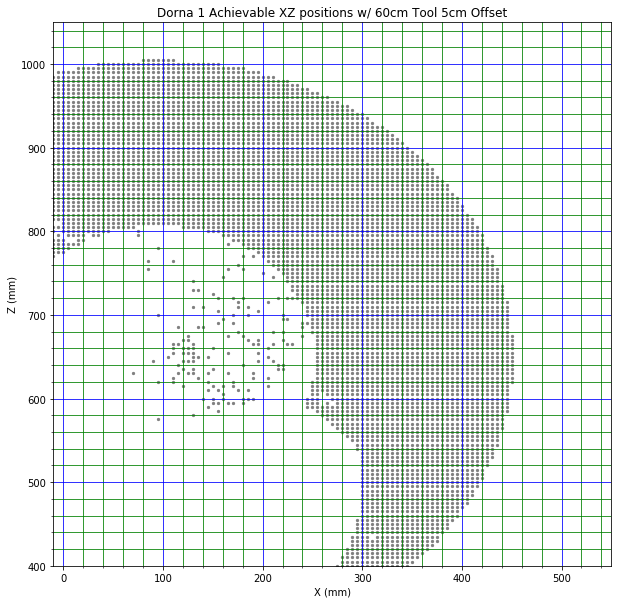

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='g', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs=[]
zs=[]
for i in range(X.size):
    for j in range(Y.size):
        for k in range(Z.size):
            if(validTheta[i,j,k]>0):
                xs.append(X[i])
                zs.append(Z[k])
for i in range(len(zs)):
    zs[i]=zs[i]-200
plt.scatter(xs,zs,s=5,color='gray')
plt.title("Dorna 1 Achievable XZ positions w/ 60cm Tool 5cm Offset")
plt.savefig("XZ_SpatialFreedomWith5cmOffset60cmTool.png")

In [8]:
from math import sqrt
goalRot = np.array([[sqrt(2)/2,0,-sqrt(2)/2],[0,1,0],[sqrt(2)/2,0,sqrt(2)/2]]).transpose()
xs = np.array(xs)
zs = np.array(zs)

In [11]:
# instantiate loop variables
validTheta = np.zeros((xs.size, 1, 1)); # indicates presence of solution at each test point
print(zs.size*xs.size)
# thetaMap = [[[np.ones((5,1))*-99 for i in zs] for j in range(1)] for k in xs];
# print(thetaMap)
valCount=0
invalCount = 0
totCount=0
lastValTheta = np.zeros((len(S[0]),1)) #stores last ik solution
j=0
for i in range(xs.size):
    for k in range(1):
        print("valid=",valCount,"invalid=",invalCount,"tested",totCount,"out of",xs.size*zs.size,[xs[i],zs[i]])
        totCount+=1
        goalPos = np.array([[xs[i],0,zs[i]]]).transpose();
        goalT = toPose(goalRot,goalPos);
        thetaMat,norm = findIK(goalT, S,M,max_iter=100);
        if(len(thetaMat)>0):
            print(len(thetaMat))
#                 print(thetaMat,"\n")
            valCount+=1
            lastValTheta=thetaMat[0]
            validTheta[i,j,k]=len(thetaMat)
#             print(thetaMat)
#             thetaMap[i][j][k]=thetaMat;
        else:
            invalCount+=1
            print(norm)

31753225
valid= 0 invalid= 0 tested 0 out of 31753225 [-10, 770]
663.5571208855783
valid= 0 invalid= 1 tested 1 out of 31753225 [-10, 775]
345.9317152538424
valid= 0 invalid= 2 tested 2 out of 31753225 [-10, 780]
777.670395932963
valid= 0 invalid= 3 tested 3 out of 31753225 [-10, 785]
217.48153300384956
valid= 0 invalid= 4 tested 4 out of 31753225 [-10, 790]
393.57094285065335
valid= 0 invalid= 5 tested 5 out of 31753225 [-10, 800]
488.5863832871364
valid= 0 invalid= 6 tested 6 out of 31753225 [-10, 805]
786.5842290600211
valid= 0 invalid= 7 tested 7 out of 31753225 [-10, 815]
366.9193665308722
valid= 0 invalid= 8 tested 8 out of 31753225 [-10, 820]
120.9931270043829
valid= 0 invalid= 9 tested 9 out of 31753225 [-10, 825]
328.9310638898696
valid= 0 invalid= 10 tested 10 out of 31753225 [-10, 830]
354.8894012769594
valid= 0 invalid= 11 tested 11 out of 31753225 [-10, 835]
245.99477217636112
valid= 0 invalid= 12 tested 12 out of 31753225 [-10, 840]
354.7867387165219
valid= 0 invalid= 13 

394.9764628186527
valid= 2 invalid= 108 tested 110 out of 31753225 [0, 910]
580.9609633759586
valid= 2 invalid= 109 tested 111 out of 31753225 [0, 915]
409.9893227661783
valid= 2 invalid= 110 tested 112 out of 31753225 [0, 920]
413.43863710450455
valid= 2 invalid= 111 tested 113 out of 31753225 [0, 925]
420.51274015256286
valid= 2 invalid= 112 tested 114 out of 31753225 [0, 930]
884.0996210063688
valid= 2 invalid= 113 tested 115 out of 31753225 [0, 935]
429.4759620344566
valid= 2 invalid= 114 tested 116 out of 31753225 [0, 940]
579.7329412528525
valid= 2 invalid= 115 tested 117 out of 31753225 [0, 945]
717.26586208983
valid= 2 invalid= 116 tested 118 out of 31753225 [0, 950]
734.1071071594176
valid= 2 invalid= 117 tested 119 out of 31753225 [0, 955]
512.2760833450058
valid= 2 invalid= 118 tested 120 out of 31753225 [0, 960]
471.5604931285865
valid= 2 invalid= 119 tested 121 out of 31753225 [0, 965]
459.3348935069863
valid= 2 invalid= 120 tested 122 out of 31753225 [0, 970]
308.20978074

233.04798593134808
valid= 3 invalid= 215 tested 218 out of 31753225 [15, 825]
522.6763047663283
valid= 3 invalid= 216 tested 219 out of 31753225 [15, 830]
356.6273879761661
valid= 3 invalid= 217 tested 220 out of 31753225 [15, 835]
836.7493149811563
valid= 3 invalid= 218 tested 221 out of 31753225 [15, 840]
543.4383571411433
valid= 3 invalid= 219 tested 222 out of 31753225 [15, 845]
293.17573325697464
valid= 3 invalid= 220 tested 223 out of 31753225 [15, 850]
263.4203823360383
valid= 3 invalid= 221 tested 224 out of 31753225 [15, 855]
361.1401982739112
valid= 3 invalid= 222 tested 225 out of 31753225 [15, 860]
351.7849150161573
valid= 3 invalid= 223 tested 226 out of 31753225 [15, 865]
354.977619912133
valid= 3 invalid= 224 tested 227 out of 31753225 [15, 870]
355.0410155848124
valid= 3 invalid= 225 tested 228 out of 31753225 [15, 875]
355.33232600757873
valid= 3 invalid= 226 tested 229 out of 31753225 [15, 880]
759.0924482536906
valid= 3 invalid= 227 tested 230 out of 31753225 [15, 88

236.5272017658212
valid= 4 invalid= 321 tested 325 out of 31753225 [25, 950]
749.7614691147278
valid= 4 invalid= 322 tested 326 out of 31753225 [25, 955]
418.20401485365574
valid= 4 invalid= 323 tested 327 out of 31753225 [25, 960]
397.3187178622178
valid= 4 invalid= 324 tested 328 out of 31753225 [25, 965]
662.8869273911105
valid= 4 invalid= 325 tested 329 out of 31753225 [25, 970]
420.82317058943295
valid= 4 invalid= 326 tested 330 out of 31753225 [25, 975]
470.09987832249993
valid= 4 invalid= 327 tested 331 out of 31753225 [25, 980]
291.169992062977
valid= 4 invalid= 328 tested 332 out of 31753225 [25, 985]
575.3035318978415
valid= 4 invalid= 329 tested 333 out of 31753225 [25, 990]
337.11575587982713
valid= 4 invalid= 330 tested 334 out of 31753225 [25, 995]
366.8198197022731
valid= 4 invalid= 331 tested 335 out of 31753225 [30, 795]
581.2732030809397
valid= 4 invalid= 332 tested 336 out of 31753225 [30, 800]
742.2008652905095
valid= 4 invalid= 333 tested 337 out of 31753225 [30, 8

565.1085294246695
valid= 6 invalid= 426 tested 432 out of 31753225 [40, 870]
565.3559946855881
valid= 6 invalid= 427 tested 433 out of 31753225 [40, 875]
161.77724445119168
valid= 6 invalid= 428 tested 434 out of 31753225 [40, 880]
123.46398351018286
valid= 6 invalid= 429 tested 435 out of 31753225 [40, 885]
309.6403879196929
valid= 6 invalid= 430 tested 436 out of 31753225 [40, 890]
233.4980325494733
valid= 6 invalid= 431 tested 437 out of 31753225 [40, 895]
698.8195145688138
valid= 6 invalid= 432 tested 438 out of 31753225 [40, 900]
520.0629684181555
valid= 6 invalid= 433 tested 439 out of 31753225 [40, 905]
354.7890734427613
valid= 6 invalid= 434 tested 440 out of 31753225 [40, 910]
355.5036875984212
valid= 6 invalid= 435 tested 441 out of 31753225 [40, 915]
357.30232939250936
valid= 6 invalid= 436 tested 442 out of 31753225 [40, 920]
364.0447674529292
valid= 6 invalid= 437 tested 443 out of 31753225 [40, 925]
370.4585399431546
valid= 6 invalid= 438 tested 444 out of 31753225 [40, 9

259.64032952336294
valid= 7 invalid= 532 tested 539 out of 31753225 [50, 1000]
185.7266623255251
valid= 7 invalid= 533 tested 540 out of 31753225 [55, 805]
707.3946362904
valid= 7 invalid= 534 tested 541 out of 31753225 [55, 810]
57.9194986487078
valid= 7 invalid= 535 tested 542 out of 31753225 [55, 815]
693.4468271459283
valid= 7 invalid= 536 tested 543 out of 31753225 [55, 820]
368.1538492175583
valid= 7 invalid= 537 tested 544 out of 31753225 [55, 825]
250.76623337118428
valid= 7 invalid= 538 tested 545 out of 31753225 [55, 830]
710.6257441202084
valid= 7 invalid= 539 tested 546 out of 31753225 [55, 835]
513.935119576688
valid= 7 invalid= 540 tested 547 out of 31753225 [55, 840]
552.72628449865
valid= 7 invalid= 541 tested 548 out of 31753225 [55, 845]
232.66261503767007
valid= 7 invalid= 542 tested 549 out of 31753225 [55, 850]
91.98033226471838
valid= 7 invalid= 543 tested 550 out of 31753225 [55, 855]
570.9258462552424
valid= 7 invalid= 544 tested 551 out of 31753225 [55, 860]
86

355.39210454581604
valid= 7 invalid= 639 tested 646 out of 31753225 [65, 935]
828.7558806169942
valid= 7 invalid= 640 tested 647 out of 31753225 [65, 940]
222.37946854548798
valid= 7 invalid= 641 tested 648 out of 31753225 [65, 945]
815.0074256936531
valid= 7 invalid= 642 tested 649 out of 31753225 [65, 950]
637.8043651060394
valid= 7 invalid= 643 tested 650 out of 31753225 [65, 955]
523.3615868055978
valid= 7 invalid= 644 tested 651 out of 31753225 [65, 960]
476.62167211104315
valid= 7 invalid= 645 tested 652 out of 31753225 [65, 965]
395.9646657561255
valid= 7 invalid= 646 tested 653 out of 31753225 [65, 970]
377.54452308393866
valid= 7 invalid= 647 tested 654 out of 31753225 [65, 975]
409.78639273022964
valid= 7 invalid= 648 tested 655 out of 31753225 [65, 980]
759.8924795354441
valid= 7 invalid= 649 tested 656 out of 31753225 [65, 985]
528.5379134526742
valid= 7 invalid= 650 tested 657 out of 31753225 [65, 990]
694.8227628783026
valid= 7 invalid= 651 tested 658 out of 31753225 [65,

77.64803620895167
valid= 9 invalid= 744 tested 753 out of 31753225 [80, 865]
873.1941470448107
valid= 9 invalid= 745 tested 754 out of 31753225 [80, 870]
698.6026530623399
valid= 9 invalid= 746 tested 755 out of 31753225 [80, 875]
111.89215968160933
valid= 9 invalid= 747 tested 756 out of 31753225 [80, 880]
561.2359101660174
valid= 9 invalid= 748 tested 757 out of 31753225 [80, 885]
744.9214437220361
valid= 9 invalid= 749 tested 758 out of 31753225 [80, 890]
399.1551949355172
valid= 9 invalid= 750 tested 759 out of 31753225 [80, 895]
208.6276475310396
valid= 9 invalid= 751 tested 760 out of 31753225 [80, 900]
603.3111438410484
valid= 9 invalid= 752 tested 761 out of 31753225 [80, 905]
360.6849050170718
valid= 9 invalid= 753 tested 762 out of 31753225 [80, 910]
363.54844488315854
valid= 9 invalid= 754 tested 763 out of 31753225 [80, 915]
785.9999317904877
valid= 9 invalid= 755 tested 764 out of 31753225 [80, 920]
508.03177563301455
valid= 9 invalid= 756 tested 765 out of 31753225 [80, 9

231.1956033789145
valid= 12 invalid= 847 tested 859 out of 31753225 [90, 980]
646.3508330964792
valid= 12 invalid= 848 tested 860 out of 31753225 [90, 985]
608.8984204554629
valid= 12 invalid= 849 tested 861 out of 31753225 [90, 990]
339.9311827908278
valid= 12 invalid= 850 tested 862 out of 31753225 [90, 995]
225.63340852497072
valid= 12 invalid= 851 tested 863 out of 31753225 [90, 1000]
923.6985089780296
valid= 12 invalid= 852 tested 864 out of 31753225 [90, 1005]
352.68072287931585
valid= 12 invalid= 853 tested 865 out of 31753225 [95, 575]
0.0004109134571182981
valid= 12 invalid= 854 tested 866 out of 31753225 [95, 620]
1
valid= 13 invalid= 854 tested 867 out of 31753225 [95, 700]
1
valid= 14 invalid= 854 tested 868 out of 31753225 [95, 780]
280.741967443275
valid= 14 invalid= 855 tested 869 out of 31753225 [95, 810]
22.31192929316861
valid= 14 invalid= 856 tested 870 out of 31753225 [95, 815]
164.63470395514395
valid= 14 invalid= 857 tested 871 out of 31753225 [95, 820]
311.887988

1
valid= 17 invalid= 947 tested 964 out of 31753225 [105, 880]
169.69398683419905
valid= 17 invalid= 948 tested 965 out of 31753225 [105, 885]
188.52326622118082
valid= 17 invalid= 949 tested 966 out of 31753225 [105, 890]
209.48187163994604
valid= 17 invalid= 950 tested 967 out of 31753225 [105, 895]
610.0203189894605
valid= 17 invalid= 951 tested 968 out of 31753225 [105, 900]
329.6192442819318
valid= 17 invalid= 952 tested 969 out of 31753225 [105, 905]
590.9268810248626
valid= 17 invalid= 953 tested 970 out of 31753225 [105, 910]
230.3213032989244
valid= 17 invalid= 954 tested 971 out of 31753225 [105, 915]
309.7147993145324
valid= 17 invalid= 955 tested 972 out of 31753225 [105, 920]
111.58064693944364
valid= 17 invalid= 956 tested 973 out of 31753225 [105, 925]
499.05398968576327
valid= 17 invalid= 957 tested 974 out of 31753225 [105, 930]
368.7134582899933
valid= 17 invalid= 958 tested 975 out of 31753225 [105, 935]
447.1223143059026
valid= 17 invalid= 959 tested 976 out of 3175

350.76683433250844
valid= 27 invalid= 1042 tested 1069 out of 31753225 [115, 955]
354.93282663672386
valid= 27 invalid= 1043 tested 1070 out of 31753225 [115, 960]
354.9927646165026
valid= 27 invalid= 1044 tested 1071 out of 31753225 [115, 965]
643.5243349031929
valid= 27 invalid= 1045 tested 1072 out of 31753225 [115, 970]
354.8250700291224
valid= 27 invalid= 1046 tested 1073 out of 31753225 [115, 975]
357.3342011441145
valid= 27 invalid= 1047 tested 1074 out of 31753225 [115, 980]
364.86143846798944
valid= 27 invalid= 1048 tested 1075 out of 31753225 [115, 985]
372.62703093169813
valid= 27 invalid= 1049 tested 1076 out of 31753225 [115, 990]
379.95952590486985
valid= 27 invalid= 1050 tested 1077 out of 31753225 [115, 995]
387.6669565097263
valid= 27 invalid= 1051 tested 1078 out of 31753225 [115, 1000]
394.92275726929677
valid= 27 invalid= 1052 tested 1079 out of 31753225 [120, 615]
1
valid= 28 invalid= 1052 tested 1080 out of 31753225 [120, 635]
1
valid= 29 invalid= 1052 tested 1081

2
valid= 43 invalid= 1130 tested 1173 out of 31753225 [130, 635]
2
valid= 44 invalid= 1130 tested 1174 out of 31753225 [130, 645]
2
valid= 45 invalid= 1130 tested 1175 out of 31753225 [130, 650]
1
valid= 46 invalid= 1130 tested 1176 out of 31753225 [130, 655]
1
valid= 47 invalid= 1130 tested 1177 out of 31753225 [130, 660]
1
valid= 48 invalid= 1130 tested 1178 out of 31753225 [130, 665]
1
valid= 49 invalid= 1130 tested 1179 out of 31753225 [130, 710]
1
valid= 50 invalid= 1130 tested 1180 out of 31753225 [130, 730]
2
valid= 51 invalid= 1130 tested 1181 out of 31753225 [130, 740]
2
valid= 52 invalid= 1130 tested 1182 out of 31753225 [130, 805]
1
valid= 53 invalid= 1130 tested 1183 out of 31753225 [130, 810]
1
valid= 54 invalid= 1130 tested 1184 out of 31753225 [130, 815]
1.2104939596272961
valid= 54 invalid= 1131 tested 1185 out of 31753225 [130, 820]
4.461911966585943
valid= 54 invalid= 1132 tested 1186 out of 31753225 [130, 825]
153.91467716684417
valid= 54 invalid= 1133 tested 1187 ou

1
valid= 70 invalid= 1210 tested 1280 out of 31753225 [140, 860]
420.46898543936896
valid= 70 invalid= 1211 tested 1281 out of 31753225 [140, 865]
225.85585550836936
valid= 70 invalid= 1212 tested 1282 out of 31753225 [140, 870]
461.54935658662515
valid= 70 invalid= 1213 tested 1283 out of 31753225 [140, 875]
769.7192662324699
valid= 70 invalid= 1214 tested 1284 out of 31753225 [140, 880]
238.29201596302198
valid= 70 invalid= 1215 tested 1285 out of 31753225 [140, 885]
216.99887956429163
valid= 70 invalid= 1216 tested 1286 out of 31753225 [140, 890]
504.4885491883156
valid= 70 invalid= 1217 tested 1287 out of 31753225 [140, 895]
863.7837184885535
valid= 70 invalid= 1218 tested 1288 out of 31753225 [140, 900]
213.95837992690963
valid= 70 invalid= 1219 tested 1289 out of 31753225 [140, 905]
655.1705330730157
valid= 70 invalid= 1220 tested 1290 out of 31753225 [140, 910]
398.76388772194144
valid= 70 invalid= 1221 tested 1291 out of 31753225 [140, 915]
651.8435253854642
valid= 70 invalid= 

344.37107075542036
valid= 94 invalid= 1292 tested 1386 out of 31753225 [150, 925]
210.05067969345876
valid= 94 invalid= 1293 tested 1387 out of 31753225 [150, 930]
851.5114832687545
valid= 94 invalid= 1294 tested 1388 out of 31753225 [150, 935]
888.3262907095715
valid= 94 invalid= 1295 tested 1389 out of 31753225 [150, 940]
379.1087611525546
valid= 94 invalid= 1296 tested 1390 out of 31753225 [150, 945]
109.22484821767993
valid= 94 invalid= 1297 tested 1391 out of 31753225 [150, 950]
457.1756763190985
valid= 94 invalid= 1298 tested 1392 out of 31753225 [150, 955]
118.02721919146165
valid= 94 invalid= 1299 tested 1393 out of 31753225 [150, 960]
189.6547422510067
valid= 94 invalid= 1300 tested 1394 out of 31753225 [150, 965]
380.4321246598361
valid= 94 invalid= 1301 tested 1395 out of 31753225 [150, 970]
344.7809793566476
valid= 94 invalid= 1302 tested 1396 out of 31753225 [150, 975]
159.27377478438495
valid= 94 invalid= 1303 tested 1397 out of 31753225 [150, 980]
433.6184242767267
valid

712.2949687692981
valid= 123 invalid= 1369 tested 1492 out of 31753225 [160, 985]
355.1721947635549
valid= 123 invalid= 1370 tested 1493 out of 31753225 [160, 990]
157.21829284598675
valid= 123 invalid= 1371 tested 1494 out of 31753225 [160, 995]
697.9077659553853
valid= 123 invalid= 1372 tested 1495 out of 31753225 [165, 595]
1
valid= 124 invalid= 1372 tested 1496 out of 31753225 [165, 630]
2
valid= 125 invalid= 1372 tested 1497 out of 31753225 [165, 655]
1
valid= 126 invalid= 1372 tested 1498 out of 31753225 [165, 675]
2
valid= 127 invalid= 1372 tested 1499 out of 31753225 [165, 755]
1
valid= 128 invalid= 1372 tested 1500 out of 31753225 [165, 785]
2
valid= 129 invalid= 1372 tested 1501 out of 31753225 [165, 795]
2
valid= 130 invalid= 1372 tested 1502 out of 31753225 [165, 800]
1
valid= 131 invalid= 1372 tested 1503 out of 31753225 [165, 805]
2
valid= 132 invalid= 1372 tested 1504 out of 31753225 [165, 810]
1
valid= 133 invalid= 1372 tested 1505 out of 31753225 [165, 815]
2
valid= 13

2
valid= 162 invalid= 1438 tested 1600 out of 31753225 [175, 815]
2
valid= 163 invalid= 1438 tested 1601 out of 31753225 [175, 820]
2
valid= 164 invalid= 1438 tested 1602 out of 31753225 [175, 825]
2
valid= 165 invalid= 1438 tested 1603 out of 31753225 [175, 830]
2
valid= 166 invalid= 1438 tested 1604 out of 31753225 [175, 835]
1
valid= 167 invalid= 1438 tested 1605 out of 31753225 [175, 840]
2
valid= 168 invalid= 1438 tested 1606 out of 31753225 [175, 845]
1
valid= 169 invalid= 1438 tested 1607 out of 31753225 [175, 850]
1
valid= 170 invalid= 1438 tested 1608 out of 31753225 [175, 855]
202.9260700599139
valid= 170 invalid= 1439 tested 1609 out of 31753225 [175, 860]
467.00171663239644
valid= 170 invalid= 1440 tested 1610 out of 31753225 [175, 865]
381.7564714536653
valid= 170 invalid= 1441 tested 1611 out of 31753225 [175, 870]
346.25770751214463
valid= 170 invalid= 1442 tested 1612 out of 31753225 [175, 875]
337.26095190346564
valid= 170 invalid= 1443 tested 1613 out of 31753225 [175

376.2678574118791
valid= 212 invalid= 1498 tested 1710 out of 31753225 [185, 870]
11.618713608485178
valid= 212 invalid= 1499 tested 1711 out of 31753225 [185, 875]
474.53533420950635
valid= 212 invalid= 1500 tested 1712 out of 31753225 [185, 880]
474.34948032728016
valid= 212 invalid= 1501 tested 1713 out of 31753225 [185, 885]
37.120507722228474
valid= 212 invalid= 1502 tested 1714 out of 31753225 [185, 890]
474.31984530567127
valid= 212 invalid= 1503 tested 1715 out of 31753225 [185, 895]
474.09908781216706
valid= 212 invalid= 1504 tested 1716 out of 31753225 [185, 900]
195.75023698686536
valid= 212 invalid= 1505 tested 1717 out of 31753225 [185, 905]
335.16889549547597
valid= 212 invalid= 1506 tested 1718 out of 31753225 [185, 910]
738.6280894312973
valid= 212 invalid= 1507 tested 1719 out of 31753225 [185, 915]
432.4596708501892
valid= 212 invalid= 1508 tested 1720 out of 31753225 [185, 920]
383.3890559591437
valid= 212 invalid= 1509 tested 1721 out of 31753225 [185, 925]
133.2718

448.25550276756644
valid= 258 invalid= 1561 tested 1819 out of 31753225 [195, 930]
65.27198647023327
valid= 258 invalid= 1562 tested 1820 out of 31753225 [195, 935]
528.7125080149364
valid= 258 invalid= 1563 tested 1821 out of 31753225 [195, 940]
79.37710888467049
valid= 258 invalid= 1564 tested 1822 out of 31753225 [195, 945]
80.76014507171796
valid= 258 invalid= 1565 tested 1823 out of 31753225 [195, 950]
106.82073833426556
valid= 258 invalid= 1566 tested 1824 out of 31753225 [195, 955]
191.63492590040497
valid= 258 invalid= 1567 tested 1825 out of 31753225 [195, 960]
332.5949643742067
valid= 258 invalid= 1568 tested 1826 out of 31753225 [195, 965]
412.88762835820677
valid= 258 invalid= 1569 tested 1827 out of 31753225 [195, 970]
475.397498105805
valid= 258 invalid= 1570 tested 1828 out of 31753225 [195, 975]
549.5164241646783
valid= 258 invalid= 1571 tested 1829 out of 31753225 [195, 980]
130.17079479695207
valid= 258 invalid= 1572 tested 1830 out of 31753225 [195, 985]
126.80378265

3
valid= 308 invalid= 1621 tested 1929 out of 31753225 [210, 680]
2
valid= 309 invalid= 1621 tested 1930 out of 31753225 [210, 745]
2
valid= 310 invalid= 1621 tested 1931 out of 31753225 [210, 760]
1
valid= 311 invalid= 1621 tested 1932 out of 31753225 [210, 765]
13.18785144767062
valid= 311 invalid= 1622 tested 1933 out of 31753225 [210, 770]
1
valid= 312 invalid= 1622 tested 1934 out of 31753225 [210, 775]
2
valid= 313 invalid= 1622 tested 1935 out of 31753225 [210, 780]
1
valid= 314 invalid= 1622 tested 1936 out of 31753225 [210, 785]
2
valid= 315 invalid= 1622 tested 1937 out of 31753225 [210, 790]
2
valid= 316 invalid= 1622 tested 1938 out of 31753225 [210, 795]
2
valid= 317 invalid= 1622 tested 1939 out of 31753225 [210, 800]
2
valid= 318 invalid= 1622 tested 1940 out of 31753225 [210, 805]
2
valid= 319 invalid= 1622 tested 1941 out of 31753225 [210, 810]
2
valid= 320 invalid= 1622 tested 1942 out of 31753225 [210, 815]
2
valid= 321 invalid= 1622 tested 1943 out of 31753225 [210,

2
valid= 375 invalid= 1667 tested 2042 out of 31753225 [220, 800]
2
valid= 376 invalid= 1667 tested 2043 out of 31753225 [220, 805]
2
valid= 377 invalid= 1667 tested 2044 out of 31753225 [220, 810]
2
valid= 378 invalid= 1667 tested 2045 out of 31753225 [220, 815]
2
valid= 379 invalid= 1667 tested 2046 out of 31753225 [220, 820]
2
valid= 380 invalid= 1667 tested 2047 out of 31753225 [220, 825]
1
valid= 381 invalid= 1667 tested 2048 out of 31753225 [220, 830]
1
valid= 382 invalid= 1667 tested 2049 out of 31753225 [220, 835]
1
valid= 383 invalid= 1667 tested 2050 out of 31753225 [220, 840]
2
valid= 384 invalid= 1667 tested 2051 out of 31753225 [220, 845]
2
valid= 385 invalid= 1667 tested 2052 out of 31753225 [220, 850]
2
valid= 386 invalid= 1667 tested 2053 out of 31753225 [220, 855]
2
valid= 387 invalid= 1667 tested 2054 out of 31753225 [220, 860]
1
valid= 388 invalid= 1667 tested 2055 out of 31753225 [220, 865]
2
valid= 389 invalid= 1667 tested 2056 out of 31753225 [220, 870]
1
valid= 3

2
valid= 447 invalid= 1709 tested 2156 out of 31753225 [230, 845]
1
valid= 448 invalid= 1709 tested 2157 out of 31753225 [230, 850]
1
valid= 449 invalid= 1709 tested 2158 out of 31753225 [230, 855]
1
valid= 450 invalid= 1709 tested 2159 out of 31753225 [230, 860]
1
valid= 451 invalid= 1709 tested 2160 out of 31753225 [230, 865]
2
valid= 452 invalid= 1709 tested 2161 out of 31753225 [230, 870]
1
valid= 453 invalid= 1709 tested 2162 out of 31753225 [230, 875]
1
valid= 454 invalid= 1709 tested 2163 out of 31753225 [230, 880]
1
valid= 455 invalid= 1709 tested 2164 out of 31753225 [230, 885]
5.103439164472517
valid= 455 invalid= 1710 tested 2165 out of 31753225 [230, 890]
8.896690553596908
valid= 455 invalid= 1711 tested 2166 out of 31753225 [230, 895]
16.506829568959674
valid= 455 invalid= 1712 tested 2167 out of 31753225 [230, 900]
473.42134281940605
valid= 455 invalid= 1713 tested 2168 out of 31753225 [230, 905]
473.5562315311006
valid= 455 invalid= 1714 tested 2169 out of 31753225 [230,

1
valid= 524 invalid= 1747 tested 2271 out of 31753225 [240, 880]
1
valid= 525 invalid= 1747 tested 2272 out of 31753225 [240, 885]
0.5793694030503111
valid= 525 invalid= 1748 tested 2273 out of 31753225 [240, 890]
52.643796005114424
valid= 525 invalid= 1749 tested 2274 out of 31753225 [240, 895]
692.3152135129775
valid= 525 invalid= 1750 tested 2275 out of 31753225 [240, 900]
266.63035983598263
valid= 525 invalid= 1751 tested 2276 out of 31753225 [240, 905]
132.32142981243274
valid= 525 invalid= 1752 tested 2277 out of 31753225 [240, 910]
532.8631148078545
valid= 525 invalid= 1753 tested 2278 out of 31753225 [240, 915]
36.87433735950165
valid= 525 invalid= 1754 tested 2279 out of 31753225 [240, 920]
160.47292841068017
valid= 525 invalid= 1755 tested 2280 out of 31753225 [240, 925]
713.240972750991
valid= 525 invalid= 1756 tested 2281 out of 31753225 [240, 930]
745.4147333069141
valid= 525 invalid= 1757 tested 2282 out of 31753225 [240, 935]
85.2659259571765
valid= 525 invalid= 1758 te

2
valid= 602 invalid= 1784 tested 2386 out of 31753225 [250, 830]
1
valid= 603 invalid= 1784 tested 2387 out of 31753225 [250, 835]
1
valid= 604 invalid= 1784 tested 2388 out of 31753225 [250, 840]
1
valid= 605 invalid= 1784 tested 2389 out of 31753225 [250, 845]
1
valid= 606 invalid= 1784 tested 2390 out of 31753225 [250, 850]
1
valid= 607 invalid= 1784 tested 2391 out of 31753225 [250, 855]
1
valid= 608 invalid= 1784 tested 2392 out of 31753225 [250, 860]
1
valid= 609 invalid= 1784 tested 2393 out of 31753225 [250, 865]
2
valid= 610 invalid= 1784 tested 2394 out of 31753225 [250, 870]
2
valid= 611 invalid= 1784 tested 2395 out of 31753225 [250, 875]
349.05631845943503
valid= 611 invalid= 1785 tested 2396 out of 31753225 [250, 880]
1
valid= 612 invalid= 1785 tested 2397 out of 31753225 [250, 885]
1
valid= 613 invalid= 1785 tested 2398 out of 31753225 [250, 890]
462.9103006538085
valid= 613 invalid= 1786 tested 2399 out of 31753225 [250, 895]
8.004061265764438
valid= 613 invalid= 1787 

1
valid= 682 invalid= 1820 tested 2502 out of 31753225 [260, 650]
1
valid= 683 invalid= 1820 tested 2503 out of 31753225 [260, 655]
8.599546608600834e-09
valid= 683 invalid= 1821 tested 2504 out of 31753225 [260, 660]
1
valid= 684 invalid= 1821 tested 2505 out of 31753225 [260, 665]
2
valid= 685 invalid= 1821 tested 2506 out of 31753225 [260, 670]
3
valid= 686 invalid= 1821 tested 2507 out of 31753225 [260, 675]
2
valid= 687 invalid= 1821 tested 2508 out of 31753225 [260, 680]
2
valid= 688 invalid= 1821 tested 2509 out of 31753225 [260, 685]
2
valid= 689 invalid= 1821 tested 2510 out of 31753225 [260, 690]
2
valid= 690 invalid= 1821 tested 2511 out of 31753225 [260, 695]
1
valid= 691 invalid= 1821 tested 2512 out of 31753225 [260, 700]
2
valid= 692 invalid= 1821 tested 2513 out of 31753225 [260, 705]
2
valid= 693 invalid= 1821 tested 2514 out of 31753225 [260, 710]
2
valid= 694 invalid= 1821 tested 2515 out of 31753225 [260, 715]
3
valid= 695 invalid= 1821 tested 2516 out of 31753225 [

2
valid= 783 invalid= 1839 tested 2622 out of 31753225 [265, 865]
2
valid= 784 invalid= 1839 tested 2623 out of 31753225 [265, 870]
2
valid= 785 invalid= 1839 tested 2624 out of 31753225 [265, 875]
2
valid= 786 invalid= 1839 tested 2625 out of 31753225 [265, 880]
2
valid= 787 invalid= 1839 tested 2626 out of 31753225 [265, 885]
1
valid= 788 invalid= 1839 tested 2627 out of 31753225 [265, 890]
1
valid= 789 invalid= 1839 tested 2628 out of 31753225 [265, 895]
1.4892240400423937
valid= 789 invalid= 1840 tested 2629 out of 31753225 [265, 900]
9.945774792481087
valid= 789 invalid= 1841 tested 2630 out of 31753225 [265, 905]
34.3553690602475
valid= 789 invalid= 1842 tested 2631 out of 31753225 [265, 910]
708.7466743393237
valid= 789 invalid= 1843 tested 2632 out of 31753225 [265, 915]
722.5187371163407
valid= 789 invalid= 1844 tested 2633 out of 31753225 [265, 920]
144.65447946273235
valid= 789 invalid= 1845 tested 2634 out of 31753225 [265, 925]
42.98940974041581
valid= 789 invalid= 1846 te

1
valid= 871 invalid= 1868 tested 2739 out of 31753225 [275, 660]
1
valid= 872 invalid= 1868 tested 2740 out of 31753225 [275, 665]
1
valid= 873 invalid= 1868 tested 2741 out of 31753225 [275, 670]
1
valid= 874 invalid= 1868 tested 2742 out of 31753225 [275, 675]
1
valid= 875 invalid= 1868 tested 2743 out of 31753225 [275, 680]
1
valid= 876 invalid= 1868 tested 2744 out of 31753225 [275, 685]
2
valid= 877 invalid= 1868 tested 2745 out of 31753225 [275, 690]
2
valid= 878 invalid= 1868 tested 2746 out of 31753225 [275, 695]
1
valid= 879 invalid= 1868 tested 2747 out of 31753225 [275, 700]
1
valid= 880 invalid= 1868 tested 2748 out of 31753225 [275, 705]
1
valid= 881 invalid= 1868 tested 2749 out of 31753225 [275, 710]
2
valid= 882 invalid= 1868 tested 2750 out of 31753225 [275, 715]
2
valid= 883 invalid= 1868 tested 2751 out of 31753225 [275, 720]
2
valid= 884 invalid= 1868 tested 2752 out of 31753225 [275, 725]
2
valid= 885 invalid= 1868 tested 2753 out of 31753225 [275, 730]
1
valid= 8

2
valid= 977 invalid= 1883 tested 2860 out of 31753225 [280, 850]
2
valid= 978 invalid= 1883 tested 2861 out of 31753225 [280, 855]
1
valid= 979 invalid= 1883 tested 2862 out of 31753225 [280, 860]
1
valid= 980 invalid= 1883 tested 2863 out of 31753225 [280, 865]
2
valid= 981 invalid= 1883 tested 2864 out of 31753225 [280, 870]
2
valid= 982 invalid= 1883 tested 2865 out of 31753225 [280, 875]
1
valid= 983 invalid= 1883 tested 2866 out of 31753225 [280, 880]
1
valid= 984 invalid= 1883 tested 2867 out of 31753225 [280, 885]
763.7791392410884
valid= 984 invalid= 1884 tested 2868 out of 31753225 [280, 890]
1
valid= 985 invalid= 1884 tested 2869 out of 31753225 [280, 895]
220.76879517386072
valid= 985 invalid= 1885 tested 2870 out of 31753225 [280, 900]
94.62714700710642
valid= 985 invalid= 1886 tested 2871 out of 31753225 [280, 905]
477.4525863133324
valid= 985 invalid= 1887 tested 2872 out of 31753225 [280, 910]
505.2384257197895
valid= 985 invalid= 1888 tested 2873 out of 31753225 [280, 

1
valid= 1053 invalid= 1921 tested 2974 out of 31753225 [290, 550]
1
valid= 1054 invalid= 1921 tested 2975 out of 31753225 [290, 555]
1
valid= 1055 invalid= 1921 tested 2976 out of 31753225 [290, 560]
1
valid= 1056 invalid= 1921 tested 2977 out of 31753225 [290, 565]
1
valid= 1057 invalid= 1921 tested 2978 out of 31753225 [290, 570]
1
valid= 1058 invalid= 1921 tested 2979 out of 31753225 [290, 575]
1
valid= 1059 invalid= 1921 tested 2980 out of 31753225 [290, 580]
1
valid= 1060 invalid= 1921 tested 2981 out of 31753225 [290, 585]
1
valid= 1061 invalid= 1921 tested 2982 out of 31753225 [290, 590]
1
valid= 1062 invalid= 1921 tested 2983 out of 31753225 [290, 595]
354.69017218483793
valid= 1062 invalid= 1922 tested 2984 out of 31753225 [290, 600]
1
valid= 1063 invalid= 1922 tested 2985 out of 31753225 [290, 605]
1
valid= 1064 invalid= 1922 tested 2986 out of 31753225 [290, 610]
1
valid= 1065 invalid= 1922 tested 2987 out of 31753225 [290, 615]
1
valid= 1066 invalid= 1922 tested 2988 out o

1
valid= 1136 invalid= 1952 tested 3088 out of 31753225 [295, 650]
1
valid= 1137 invalid= 1952 tested 3089 out of 31753225 [295, 655]
0.00014218903542095973
valid= 1137 invalid= 1953 tested 3090 out of 31753225 [295, 660]
1
valid= 1138 invalid= 1953 tested 3091 out of 31753225 [295, 665]
5.397379824813534e-06
valid= 1138 invalid= 1954 tested 3092 out of 31753225 [295, 670]
281.14024691913676
valid= 1138 invalid= 1955 tested 3093 out of 31753225 [295, 675]
6.368125608713838e-07
valid= 1138 invalid= 1956 tested 3094 out of 31753225 [295, 680]
1
valid= 1139 invalid= 1956 tested 3095 out of 31753225 [295, 685]
0.00010660047949932736
valid= 1139 invalid= 1957 tested 3096 out of 31753225 [295, 690]
1
valid= 1140 invalid= 1957 tested 3097 out of 31753225 [295, 695]
1
valid= 1141 invalid= 1957 tested 3098 out of 31753225 [295, 700]
2
valid= 1142 invalid= 1957 tested 3099 out of 31753225 [295, 705]
3
valid= 1143 invalid= 1957 tested 3100 out of 31753225 [295, 710]
2
valid= 1144 invalid= 1957 te

4.888115247943227e-05
valid= 1203 invalid= 1996 tested 3199 out of 31753225 [300, 660]
1.6867940019571106e-08
valid= 1203 invalid= 1997 tested 3200 out of 31753225 [300, 665]
5.341499356942515e-05
valid= 1203 invalid= 1998 tested 3201 out of 31753225 [300, 670]
1
valid= 1204 invalid= 1998 tested 3202 out of 31753225 [300, 675]
8.30097085168524e-07
valid= 1204 invalid= 1999 tested 3203 out of 31753225 [300, 680]
1
valid= 1205 invalid= 1999 tested 3204 out of 31753225 [300, 685]
1
valid= 1206 invalid= 1999 tested 3205 out of 31753225 [300, 690]
1
valid= 1207 invalid= 1999 tested 3206 out of 31753225 [300, 695]
2
valid= 1208 invalid= 1999 tested 3207 out of 31753225 [300, 700]
2
valid= 1209 invalid= 1999 tested 3208 out of 31753225 [300, 705]
3
valid= 1210 invalid= 1999 tested 3209 out of 31753225 [300, 710]
3
valid= 1211 invalid= 1999 tested 3210 out of 31753225 [300, 715]
3
valid= 1212 invalid= 1999 tested 3211 out of 31753225 [300, 720]
2
valid= 1213 invalid= 1999 tested 3212 out of 31

5.990761703043062e-08
valid= 1264 invalid= 2044 tested 3308 out of 31753225 [305, 660]
1
valid= 1265 invalid= 2044 tested 3309 out of 31753225 [305, 665]
1
valid= 1266 invalid= 2044 tested 3310 out of 31753225 [305, 670]
1
valid= 1267 invalid= 2044 tested 3311 out of 31753225 [305, 675]
1
valid= 1268 invalid= 2044 tested 3312 out of 31753225 [305, 680]
1
valid= 1269 invalid= 2044 tested 3313 out of 31753225 [305, 685]
1
valid= 1270 invalid= 2044 tested 3314 out of 31753225 [305, 690]
3.4384437479363517e-07
valid= 1270 invalid= 2045 tested 3315 out of 31753225 [305, 695]
1
valid= 1271 invalid= 2045 tested 3316 out of 31753225 [305, 700]
3
valid= 1272 invalid= 2045 tested 3317 out of 31753225 [305, 705]
3
valid= 1273 invalid= 2045 tested 3318 out of 31753225 [305, 710]
3
valid= 1274 invalid= 2045 tested 3319 out of 31753225 [305, 715]
3
valid= 1275 invalid= 2045 tested 3320 out of 31753225 [305, 720]
4
valid= 1276 invalid= 2045 tested 3321 out of 31753225 [305, 725]
4
valid= 1277 invalid

1
valid= 1328 invalid= 2090 tested 3418 out of 31753225 [310, 675]
1
valid= 1329 invalid= 2090 tested 3419 out of 31753225 [310, 680]
1
valid= 1330 invalid= 2090 tested 3420 out of 31753225 [310, 685]
1
valid= 1331 invalid= 2090 tested 3421 out of 31753225 [310, 690]
1
valid= 1332 invalid= 2090 tested 3422 out of 31753225 [310, 695]
4.7582706353741554e-08
valid= 1332 invalid= 2091 tested 3423 out of 31753225 [310, 700]
3
valid= 1333 invalid= 2091 tested 3424 out of 31753225 [310, 705]
3
valid= 1334 invalid= 2091 tested 3425 out of 31753225 [310, 710]
3
valid= 1335 invalid= 2091 tested 3426 out of 31753225 [310, 715]
3
valid= 1336 invalid= 2091 tested 3427 out of 31753225 [310, 720]
3
valid= 1337 invalid= 2091 tested 3428 out of 31753225 [310, 725]
3
valid= 1338 invalid= 2091 tested 3429 out of 31753225 [310, 730]
2
valid= 1339 invalid= 2091 tested 3430 out of 31753225 [310, 735]
3
valid= 1340 invalid= 2091 tested 3431 out of 31753225 [310, 740]
3
valid= 1341 invalid= 2091 tested 3432 o

1
valid= 1390 invalid= 2137 tested 3527 out of 31753225 [315, 685]
1
valid= 1391 invalid= 2137 tested 3528 out of 31753225 [315, 690]
0.00035256872834251845
valid= 1391 invalid= 2138 tested 3529 out of 31753225 [315, 695]
2
valid= 1392 invalid= 2138 tested 3530 out of 31753225 [315, 700]
1
valid= 1393 invalid= 2138 tested 3531 out of 31753225 [315, 705]
3
valid= 1394 invalid= 2138 tested 3532 out of 31753225 [315, 710]
3
valid= 1395 invalid= 2138 tested 3533 out of 31753225 [315, 715]
3
valid= 1396 invalid= 2138 tested 3534 out of 31753225 [315, 720]
3
valid= 1397 invalid= 2138 tested 3535 out of 31753225 [315, 725]
2
valid= 1398 invalid= 2138 tested 3536 out of 31753225 [315, 730]
2
valid= 1399 invalid= 2138 tested 3537 out of 31753225 [315, 735]
2
valid= 1400 invalid= 2138 tested 3538 out of 31753225 [315, 740]
3
valid= 1401 invalid= 2138 tested 3539 out of 31753225 [315, 745]
3
valid= 1402 invalid= 2138 tested 3540 out of 31753225 [315, 750]
4
valid= 1403 invalid= 2138 tested 3541 o

1
valid= 1452 invalid= 2184 tested 3636 out of 31753225 [320, 700]
2
valid= 1453 invalid= 2184 tested 3637 out of 31753225 [320, 705]
3
valid= 1454 invalid= 2184 tested 3638 out of 31753225 [320, 710]
3
valid= 1455 invalid= 2184 tested 3639 out of 31753225 [320, 715]
2
valid= 1456 invalid= 2184 tested 3640 out of 31753225 [320, 720]
2
valid= 1457 invalid= 2184 tested 3641 out of 31753225 [320, 725]
3
valid= 1458 invalid= 2184 tested 3642 out of 31753225 [320, 730]
3
valid= 1459 invalid= 2184 tested 3643 out of 31753225 [320, 735]
4
valid= 1460 invalid= 2184 tested 3644 out of 31753225 [320, 740]
5
valid= 1461 invalid= 2184 tested 3645 out of 31753225 [320, 745]
3
valid= 1462 invalid= 2184 tested 3646 out of 31753225 [320, 750]
3
valid= 1463 invalid= 2184 tested 3647 out of 31753225 [320, 755]
3
valid= 1464 invalid= 2184 tested 3648 out of 31753225 [320, 760]
4
valid= 1465 invalid= 2184 tested 3649 out of 31753225 [320, 765]
4
valid= 1466 invalid= 2184 tested 3650 out of 31753225 [320, 

3
valid= 1513 invalid= 2232 tested 3745 out of 31753225 [325, 715]
3
valid= 1514 invalid= 2232 tested 3746 out of 31753225 [325, 720]
3
valid= 1515 invalid= 2232 tested 3747 out of 31753225 [325, 725]
3
valid= 1516 invalid= 2232 tested 3748 out of 31753225 [325, 730]
3
valid= 1517 invalid= 2232 tested 3749 out of 31753225 [325, 735]
3
valid= 1518 invalid= 2232 tested 3750 out of 31753225 [325, 740]
4
valid= 1519 invalid= 2232 tested 3751 out of 31753225 [325, 745]
4
valid= 1520 invalid= 2232 tested 3752 out of 31753225 [325, 750]
3
valid= 1521 invalid= 2232 tested 3753 out of 31753225 [325, 755]
4
valid= 1522 invalid= 2232 tested 3754 out of 31753225 [325, 760]
4
valid= 1523 invalid= 2232 tested 3755 out of 31753225 [325, 765]
3
valid= 1524 invalid= 2232 tested 3756 out of 31753225 [325, 770]
3
valid= 1525 invalid= 2232 tested 3757 out of 31753225 [325, 775]
3
valid= 1526 invalid= 2232 tested 3758 out of 31753225 [325, 780]
3
valid= 1527 invalid= 2232 tested 3759 out of 31753225 [325, 

3
valid= 1580 invalid= 2275 tested 3855 out of 31753225 [330, 740]
4
valid= 1581 invalid= 2275 tested 3856 out of 31753225 [330, 745]
4
valid= 1582 invalid= 2275 tested 3857 out of 31753225 [330, 750]
3
valid= 1583 invalid= 2275 tested 3858 out of 31753225 [330, 755]
4
valid= 1584 invalid= 2275 tested 3859 out of 31753225 [330, 760]
3
valid= 1585 invalid= 2275 tested 3860 out of 31753225 [330, 765]
3
valid= 1586 invalid= 2275 tested 3861 out of 31753225 [330, 770]
4
valid= 1587 invalid= 2275 tested 3862 out of 31753225 [330, 775]
2
valid= 1588 invalid= 2275 tested 3863 out of 31753225 [330, 780]
3
valid= 1589 invalid= 2275 tested 3864 out of 31753225 [330, 785]
3
valid= 1590 invalid= 2275 tested 3865 out of 31753225 [330, 790]
3
valid= 1591 invalid= 2275 tested 3866 out of 31753225 [330, 795]
3
valid= 1592 invalid= 2275 tested 3867 out of 31753225 [330, 800]
4
valid= 1593 invalid= 2275 tested 3868 out of 31753225 [330, 805]
3
valid= 1594 invalid= 2275 tested 3869 out of 31753225 [330, 

3
valid= 1649 invalid= 2317 tested 3966 out of 31753225 [335, 775]
2
valid= 1650 invalid= 2317 tested 3967 out of 31753225 [335, 780]
3
valid= 1651 invalid= 2317 tested 3968 out of 31753225 [335, 785]
4
valid= 1652 invalid= 2317 tested 3969 out of 31753225 [335, 790]
3
valid= 1653 invalid= 2317 tested 3970 out of 31753225 [335, 795]
3
valid= 1654 invalid= 2317 tested 3971 out of 31753225 [335, 800]
3
valid= 1655 invalid= 2317 tested 3972 out of 31753225 [335, 805]
3
valid= 1656 invalid= 2317 tested 3973 out of 31753225 [335, 810]
3
valid= 1657 invalid= 2317 tested 3974 out of 31753225 [335, 815]
3
valid= 1658 invalid= 2317 tested 3975 out of 31753225 [335, 820]
2
valid= 1659 invalid= 2317 tested 3976 out of 31753225 [335, 825]
2
valid= 1660 invalid= 2317 tested 3977 out of 31753225 [335, 830]
1
valid= 1661 invalid= 2317 tested 3978 out of 31753225 [335, 835]
2
valid= 1662 invalid= 2317 tested 3979 out of 31753225 [335, 840]
2
valid= 1663 invalid= 2317 tested 3980 out of 31753225 [335, 

3
valid= 1717 invalid= 2360 tested 4077 out of 31753225 [340, 815]
4
valid= 1718 invalid= 2360 tested 4078 out of 31753225 [340, 820]
2
valid= 1719 invalid= 2360 tested 4079 out of 31753225 [340, 825]
2
valid= 1720 invalid= 2360 tested 4080 out of 31753225 [340, 830]
2
valid= 1721 invalid= 2360 tested 4081 out of 31753225 [340, 835]
2
valid= 1722 invalid= 2360 tested 4082 out of 31753225 [340, 840]
2
valid= 1723 invalid= 2360 tested 4083 out of 31753225 [340, 845]
2
valid= 1724 invalid= 2360 tested 4084 out of 31753225 [340, 850]
2
valid= 1725 invalid= 2360 tested 4085 out of 31753225 [340, 855]
2
valid= 1726 invalid= 2360 tested 4086 out of 31753225 [340, 860]
1
valid= 1727 invalid= 2360 tested 4087 out of 31753225 [340, 865]
1
valid= 1728 invalid= 2360 tested 4088 out of 31753225 [340, 870]
2
valid= 1729 invalid= 2360 tested 4089 out of 31753225 [340, 875]
2
valid= 1730 invalid= 2360 tested 4090 out of 31753225 [340, 880]
2
valid= 1731 invalid= 2360 tested 4091 out of 31753225 [340, 

2
valid= 1786 invalid= 2402 tested 4188 out of 31753225 [345, 860]
2
valid= 1787 invalid= 2402 tested 4189 out of 31753225 [345, 865]
2
valid= 1788 invalid= 2402 tested 4190 out of 31753225 [345, 870]
2
valid= 1789 invalid= 2402 tested 4191 out of 31753225 [345, 875]
2
valid= 1790 invalid= 2402 tested 4192 out of 31753225 [345, 880]
1
valid= 1791 invalid= 2402 tested 4193 out of 31753225 [345, 885]
2
valid= 1792 invalid= 2402 tested 4194 out of 31753225 [345, 890]
2
valid= 1793 invalid= 2402 tested 4195 out of 31753225 [345, 895]
1
valid= 1794 invalid= 2402 tested 4196 out of 31753225 [345, 900]
1
valid= 1795 invalid= 2402 tested 4197 out of 31753225 [350, 405]
256.33291311447437
valid= 1795 invalid= 2403 tested 4198 out of 31753225 [350, 410]
251.42994788631307
valid= 1795 invalid= 2404 tested 4199 out of 31753225 [350, 415]
246.7415935793115
valid= 1795 invalid= 2405 tested 4200 out of 31753225 [350, 420]
5.9139163427925785e-06
valid= 1795 invalid= 2406 tested 4201 out of 31753225 [3

9.254907334232254e-07
valid= 1853 invalid= 2446 tested 4299 out of 31753225 [355, 425]
0.00010556296046154864
valid= 1853 invalid= 2447 tested 4300 out of 31753225 [355, 430]
2.7425724431755452e-08
valid= 1853 invalid= 2448 tested 4301 out of 31753225 [355, 435]
0.0003177632919503102
valid= 1853 invalid= 2449 tested 4302 out of 31753225 [355, 440]
6.82271129695972e-05
valid= 1853 invalid= 2450 tested 4303 out of 31753225 [355, 445]
1.4452533631718463e-06
valid= 1853 invalid= 2451 tested 4304 out of 31753225 [355, 450]
1.2045811025284748e-06
valid= 1853 invalid= 2452 tested 4305 out of 31753225 [355, 455]
7.635745562174407e-09
valid= 1853 invalid= 2453 tested 4306 out of 31753225 [355, 460]
209.75961056135705
valid= 1853 invalid= 2454 tested 4307 out of 31753225 [355, 465]
3.9816255119513294e-08
valid= 1853 invalid= 2455 tested 4308 out of 31753225 [355, 470]
0.0007785392670948721
valid= 1853 invalid= 2456 tested 4309 out of 31753225 [355, 475]
1.153359217740059e-07
valid= 1853 invalid=

2.200987089172827e-05
valid= 1909 invalid= 2498 tested 4407 out of 31753225 [360, 485]
3.648323258310881e-05
valid= 1909 invalid= 2499 tested 4408 out of 31753225 [360, 490]
4.799004715274367e-06
valid= 1909 invalid= 2500 tested 4409 out of 31753225 [360, 495]
177.8751208996916
valid= 1909 invalid= 2501 tested 4410 out of 31753225 [360, 500]
1.8842644231358368e-05
valid= 1909 invalid= 2502 tested 4411 out of 31753225 [360, 505]
8.507223732910356e-05
valid= 1909 invalid= 2503 tested 4412 out of 31753225 [360, 510]
102.79197328630386
valid= 1909 invalid= 2504 tested 4413 out of 31753225 [360, 515]
7.874951327088378e-05
valid= 1909 invalid= 2505 tested 4414 out of 31753225 [360, 520]
0.00016789234208968823
valid= 1909 invalid= 2506 tested 4415 out of 31753225 [360, 525]
0.00020017174871338352
valid= 1909 invalid= 2507 tested 4416 out of 31753225 [360, 530]
115.24905636232643
valid= 1909 invalid= 2508 tested 4417 out of 31753225 [360, 535]
96.3730100243651
valid= 1909 invalid= 2509 tested 

81.34198242294131
valid= 1963 invalid= 2552 tested 4515 out of 31753225 [365, 555]
89.35166003921299
valid= 1963 invalid= 2553 tested 4516 out of 31753225 [365, 560]
86.18927586027807
valid= 1963 invalid= 2554 tested 4517 out of 31753225 [365, 565]
98.69616118056537
valid= 1963 invalid= 2555 tested 4518 out of 31753225 [365, 570]
106.51710240498085
valid= 1963 invalid= 2556 tested 4519 out of 31753225 [365, 575]
106.70317254853425
valid= 1963 invalid= 2557 tested 4520 out of 31753225 [365, 580]
124.84625667449959
valid= 1963 invalid= 2558 tested 4521 out of 31753225 [365, 585]
96.21752671706157
valid= 1963 invalid= 2559 tested 4522 out of 31753225 [365, 590]
102.5960459887107
valid= 1963 invalid= 2560 tested 4523 out of 31753225 [365, 595]
155.6067570443487
valid= 1963 invalid= 2561 tested 4524 out of 31753225 [365, 600]
13.125277248980796
valid= 1963 invalid= 2562 tested 4525 out of 31753225 [365, 605]
0.0007656733005084281
valid= 1963 invalid= 2563 tested 4526 out of 31753225 [365, 6

1
valid= 2018 invalid= 2605 tested 4623 out of 31753225 [370, 635]
1
valid= 2019 invalid= 2605 tested 4624 out of 31753225 [370, 640]
196.0654742622898
valid= 2019 invalid= 2606 tested 4625 out of 31753225 [370, 645]
0.0006382785265366353
valid= 2019 invalid= 2607 tested 4626 out of 31753225 [370, 650]
1
valid= 2020 invalid= 2607 tested 4627 out of 31753225 [370, 655]
2
valid= 2021 invalid= 2607 tested 4628 out of 31753225 [370, 660]
1
valid= 2022 invalid= 2607 tested 4629 out of 31753225 [370, 665]
2
valid= 2023 invalid= 2607 tested 4630 out of 31753225 [370, 670]
2
valid= 2024 invalid= 2607 tested 4631 out of 31753225 [370, 675]
1
valid= 2025 invalid= 2607 tested 4632 out of 31753225 [370, 680]
2
valid= 2026 invalid= 2607 tested 4633 out of 31753225 [370, 685]
1
valid= 2027 invalid= 2607 tested 4634 out of 31753225 [370, 690]
2
valid= 2028 invalid= 2607 tested 4635 out of 31753225 [370, 695]
1
valid= 2029 invalid= 2607 tested 4636 out of 31753225 [370, 700]
2
valid= 2030 invalid= 260

3
valid= 2084 invalid= 2650 tested 4734 out of 31753225 [375, 740]
4
valid= 2085 invalid= 2650 tested 4735 out of 31753225 [375, 745]
3
valid= 2086 invalid= 2650 tested 4736 out of 31753225 [375, 750]
3
valid= 2087 invalid= 2650 tested 4737 out of 31753225 [375, 755]
4
valid= 2088 invalid= 2650 tested 4738 out of 31753225 [375, 760]
3
valid= 2089 invalid= 2650 tested 4739 out of 31753225 [375, 765]
3
valid= 2090 invalid= 2650 tested 4740 out of 31753225 [375, 770]
4
valid= 2091 invalid= 2650 tested 4741 out of 31753225 [375, 775]
4
valid= 2092 invalid= 2650 tested 4742 out of 31753225 [375, 780]
3
valid= 2093 invalid= 2650 tested 4743 out of 31753225 [375, 785]
3
valid= 2094 invalid= 2650 tested 4744 out of 31753225 [375, 790]
3
valid= 2095 invalid= 2650 tested 4745 out of 31753225 [375, 795]
3
valid= 2096 invalid= 2650 tested 4746 out of 31753225 [375, 800]
4
valid= 2097 invalid= 2650 tested 4747 out of 31753225 [375, 805]
4
valid= 2098 invalid= 2650 tested 4748 out of 31753225 [375, 

0.0002932054488690713
valid= 2157 invalid= 2690 tested 4847 out of 31753225 [385, 455]
0.0002475107866624406
valid= 2157 invalid= 2691 tested 4848 out of 31753225 [385, 460]
2.0010091094946684e-08
valid= 2157 invalid= 2692 tested 4849 out of 31753225 [385, 465]
2.6697355254342057e-06
valid= 2157 invalid= 2693 tested 4850 out of 31753225 [385, 470]
7.738906396934791e-05
valid= 2157 invalid= 2694 tested 4851 out of 31753225 [385, 475]
191.45852278269228
valid= 2157 invalid= 2695 tested 4852 out of 31753225 [385, 480]
2.2693725534125437e-06
valid= 2157 invalid= 2696 tested 4853 out of 31753225 [385, 485]
189.3285673055556
valid= 2157 invalid= 2697 tested 4854 out of 31753225 [385, 490]
185.00049290309045
valid= 2157 invalid= 2698 tested 4855 out of 31753225 [385, 495]
131.1960185480933
valid= 2157 invalid= 2699 tested 4856 out of 31753225 [385, 500]
139.6029248631119
valid= 2157 invalid= 2700 tested 4857 out of 31753225 [385, 505]
0.00018212711736081996
valid= 2157 invalid= 2701 tested 48

1.664579514674882e-07
valid= 2202 invalid= 2752 tested 4954 out of 31753225 [390, 585]
116.58790955927446
valid= 2202 invalid= 2753 tested 4955 out of 31753225 [390, 590]
108.69364793933802
valid= 2202 invalid= 2754 tested 4956 out of 31753225 [390, 595]
2.676405813720956e-08
valid= 2202 invalid= 2755 tested 4957 out of 31753225 [390, 600]
8.796146413436078e-07
valid= 2202 invalid= 2756 tested 4958 out of 31753225 [390, 605]
1.3561600792611853e-06
valid= 2202 invalid= 2757 tested 4959 out of 31753225 [390, 610]
3.7139156506674435e-07
valid= 2202 invalid= 2758 tested 4960 out of 31753225 [390, 615]
0.00010317948725279068
valid= 2202 invalid= 2759 tested 4961 out of 31753225 [390, 620]
1.5699929142747679e-06
valid= 2202 invalid= 2760 tested 4962 out of 31753225 [390, 625]
2.8049577966018473e-09
valid= 2202 invalid= 2761 tested 4963 out of 31753225 [390, 630]
6.327074702224548e-06
valid= 2202 invalid= 2762 tested 4964 out of 31753225 [390, 635]
2
valid= 2203 invalid= 2762 tested 4965 out 

3
valid= 2267 invalid= 2797 tested 5064 out of 31753225 [395, 745]
2
valid= 2268 invalid= 2797 tested 5065 out of 31753225 [395, 750]
3
valid= 2269 invalid= 2797 tested 5066 out of 31753225 [395, 755]
2
valid= 2270 invalid= 2797 tested 5067 out of 31753225 [395, 760]
3
valid= 2271 invalid= 2797 tested 5068 out of 31753225 [395, 765]
3
valid= 2272 invalid= 2797 tested 5069 out of 31753225 [395, 770]
2
valid= 2273 invalid= 2797 tested 5070 out of 31753225 [395, 775]
3
valid= 2274 invalid= 2797 tested 5071 out of 31753225 [395, 780]
3
valid= 2275 invalid= 2797 tested 5072 out of 31753225 [395, 785]
4
valid= 2276 invalid= 2797 tested 5073 out of 31753225 [395, 790]
3
valid= 2277 invalid= 2797 tested 5074 out of 31753225 [395, 795]
3
valid= 2278 invalid= 2797 tested 5075 out of 31753225 [395, 800]
4
valid= 2279 invalid= 2797 tested 5076 out of 31753225 [395, 805]
4
valid= 2280 invalid= 2797 tested 5077 out of 31753225 [395, 810]
3
valid= 2281 invalid= 2797 tested 5078 out of 31753225 [395, 

3.854203057336721e-06
valid= 2326 invalid= 2847 tested 5173 out of 31753225 [405, 555]
103.09629171523544
valid= 2326 invalid= 2848 tested 5174 out of 31753225 [405, 560]
106.21750742961063
valid= 2326 invalid= 2849 tested 5175 out of 31753225 [405, 565]
101.36843535633243
valid= 2326 invalid= 2850 tested 5176 out of 31753225 [405, 570]
3.1466854054741357e-07
valid= 2326 invalid= 2851 tested 5177 out of 31753225 [405, 575]
159.99035589492112
valid= 2326 invalid= 2852 tested 5178 out of 31753225 [405, 580]
46.70266733395787
valid= 2326 invalid= 2853 tested 5179 out of 31753225 [405, 585]
1.524449058708482e-06
valid= 2326 invalid= 2854 tested 5180 out of 31753225 [405, 590]
5.769338815884981e-09
valid= 2326 invalid= 2855 tested 5181 out of 31753225 [405, 595]
2.4820999604134353e-07
valid= 2326 invalid= 2856 tested 5182 out of 31753225 [405, 600]
1.205351917770909e-07
valid= 2326 invalid= 2857 tested 5183 out of 31753225 [405, 605]
1.842705140807093e-05
valid= 2326 invalid= 2858 tested 51

4
valid= 2387 invalid= 2895 tested 5282 out of 31753225 [410, 760]
3
valid= 2388 invalid= 2895 tested 5283 out of 31753225 [410, 765]
4
valid= 2389 invalid= 2895 tested 5284 out of 31753225 [410, 770]
3
valid= 2390 invalid= 2895 tested 5285 out of 31753225 [410, 775]
2
valid= 2391 invalid= 2895 tested 5286 out of 31753225 [410, 780]
4
valid= 2392 invalid= 2895 tested 5287 out of 31753225 [410, 785]
4
valid= 2393 invalid= 2895 tested 5288 out of 31753225 [410, 790]
4
valid= 2394 invalid= 2895 tested 5289 out of 31753225 [410, 795]
3
valid= 2395 invalid= 2895 tested 5290 out of 31753225 [410, 800]
4
valid= 2396 invalid= 2895 tested 5291 out of 31753225 [410, 805]
3
valid= 2397 invalid= 2895 tested 5292 out of 31753225 [410, 810]
3
valid= 2398 invalid= 2895 tested 5293 out of 31753225 [410, 815]
4
valid= 2399 invalid= 2895 tested 5294 out of 31753225 [415, 495]
3.49445562378516e-07
valid= 2399 invalid= 2896 tested 5295 out of 31753225 [415, 500]
2.0700111083488997e-05
valid= 2399 invalid=

1
valid= 2436 invalid= 2952 tested 5388 out of 31753225 [420, 660]
2
valid= 2437 invalid= 2952 tested 5389 out of 31753225 [420, 665]
3
valid= 2438 invalid= 2952 tested 5390 out of 31753225 [420, 670]
2
valid= 2439 invalid= 2952 tested 5391 out of 31753225 [420, 675]
2
valid= 2440 invalid= 2952 tested 5392 out of 31753225 [420, 680]
2
valid= 2441 invalid= 2952 tested 5393 out of 31753225 [420, 685]
1
valid= 2442 invalid= 2952 tested 5394 out of 31753225 [420, 690]
286.4399679568444
valid= 2442 invalid= 2953 tested 5395 out of 31753225 [420, 695]
1
valid= 2443 invalid= 2953 tested 5396 out of 31753225 [420, 700]
2
valid= 2444 invalid= 2953 tested 5397 out of 31753225 [420, 705]
2
valid= 2445 invalid= 2953 tested 5398 out of 31753225 [420, 710]
3
valid= 2446 invalid= 2953 tested 5399 out of 31753225 [420, 715]
4
valid= 2447 invalid= 2953 tested 5400 out of 31753225 [420, 720]
4
valid= 2448 invalid= 2953 tested 5401 out of 31753225 [420, 725]
3
valid= 2449 invalid= 2953 tested 5402 out of

2
valid= 2493 invalid= 3003 tested 5496 out of 31753225 [430, 665]
1
valid= 2494 invalid= 3003 tested 5497 out of 31753225 [430, 670]
1
valid= 2495 invalid= 3003 tested 5498 out of 31753225 [430, 675]
2
valid= 2496 invalid= 3003 tested 5499 out of 31753225 [430, 680]
1
valid= 2497 invalid= 3003 tested 5500 out of 31753225 [430, 685]
1
valid= 2498 invalid= 3003 tested 5501 out of 31753225 [430, 690]
1
valid= 2499 invalid= 3003 tested 5502 out of 31753225 [430, 695]
2
valid= 2500 invalid= 3003 tested 5503 out of 31753225 [430, 700]
2
valid= 2501 invalid= 3003 tested 5504 out of 31753225 [430, 705]
4
valid= 2502 invalid= 3003 tested 5505 out of 31753225 [430, 710]
3
valid= 2503 invalid= 3003 tested 5506 out of 31753225 [430, 715]
2
valid= 2504 invalid= 3003 tested 5507 out of 31753225 [430, 720]
4
valid= 2505 invalid= 3003 tested 5508 out of 31753225 [430, 725]
4
valid= 2506 invalid= 3003 tested 5509 out of 31753225 [430, 730]
3
valid= 2507 invalid= 3003 tested 5510 out of 31753225 [430, 

225.18532786314935
valid= 2557 invalid= 3049 tested 5606 out of 31753225 [445, 635]
299.3394889672146
valid= 2557 invalid= 3050 tested 5607 out of 31753225 [445, 640]
2.9833868578413996e-07
valid= 2557 invalid= 3051 tested 5608 out of 31753225 [445, 645]
1
valid= 2558 invalid= 3051 tested 5609 out of 31753225 [445, 650]
1
valid= 2559 invalid= 3051 tested 5610 out of 31753225 [445, 655]
2
valid= 2560 invalid= 3051 tested 5611 out of 31753225 [445, 660]
2
valid= 2561 invalid= 3051 tested 5612 out of 31753225 [445, 665]
1
valid= 2562 invalid= 3051 tested 5613 out of 31753225 [445, 670]
1
valid= 2563 invalid= 3051 tested 5614 out of 31753225 [445, 675]
2
valid= 2564 invalid= 3051 tested 5615 out of 31753225 [445, 680]
2
valid= 2565 invalid= 3051 tested 5616 out of 31753225 [445, 685]
1
valid= 2566 invalid= 3051 tested 5617 out of 31753225 [445, 690]
2
valid= 2567 invalid= 3051 tested 5618 out of 31753225 [445, 695]
1
valid= 2568 invalid= 3051 tested 5619 out of 31753225 [445, 700]
4
valid=

In [12]:
validTheta45 = validTheta
%store validTheta45

Stored 'validTheta45' (ndarray)


IndexError: index 1 is out of bounds for axis 2 with size 1

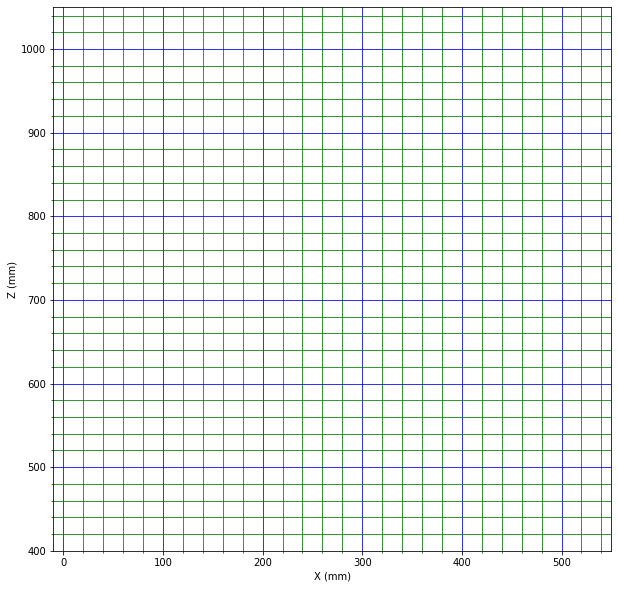

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='g', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs45=[]
zs45=[]
for i in range(xs.size):
    if(validTheta45[i,0,i]>0):
        xs45.append(xs[i])
        zs45.append(zs[i])
for i in range(len(zs45)):
    zs45[i]=zs45[i]-200
plt.scatter(xs,zs,s=5,color='gray')
plt.title("Dorna 1 Achievable XZ positions w/ 60cm Tool 5cm Offset")
plt.savefig("XZ_SpatialFreedomWith5cmOffset60cmTool.png")